# ANALISI delle EMISSIONI (Lombardia 2014)

# FASE 1: analisi, pulizia e data visualization

In [3]:
!pip install tensorflow
!pip install transformers accelerate torchvision --quiet
!pip install --upgrade scikit-learn joblib threadpoolctl
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 98.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import os
import pickle
import tensorflow as tf

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from IPython.display import display
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


Stampiamo a schermo il dataframe per visualizzarlo.

In [5]:
DF = pd.read_excel("/content/Emissioni.xls");
X = DF.copy()
X.head()

Fattori di emissione medi da traffico per settore, combustibile e tipo legislativo in Lombardia nel 2014 - public review (Fonte: INEMAR ARPA LOMBARDIA)  \
0                                                NaN                                                                                                        
1                                            Settore                                                                                                        
2                                                NaN                                                                                                        
3                                         Automobili                                                                                                        
4                                         Automobili                                                                                                        

      Unnamed: 1           Unnamed: 2                  Unnamed: 3  \
0            NaN                  NaN                         NaN   
1   Combustibile     Tipo legislativo                     Periodo   
2            NaN                  NaN                         NaN   
3  benzina verde               Euro 0                  < 01/01/93   
4  benzina verde  Euro 1 - 91/441/EEC  da 01/01/1993 a 31/12/1996   

          Unnamed: 4 Unnamed: 5   Unnamed: 6   Unnamed: 7  Unnamed: 8  \
0                NaN        NaN          NaN          NaN         NaN   
1  Consumo specifico        SO2          NOx          COV         CH4   
2               g/km      mg/km        mg/km        mg/km       mg/km   
3          61.632435   1.204133  2084.048393  1620.773665  122.076129   
4          59.253481   1.140755   711.703829   588.338866   25.705812   

     Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0           NaN         NaN         NaN         NaN         NaN         NaN   
1            CO         CO2         N2O         NH3       PM2.5        PM10   
2         mg/km        g/km       mg/km       mg/km       mg/km       mg/km   
3  12362.960114  190.028009    8.179762    1.999326   15.565311     27.0227   
4    5830.90428  182.673617   15.460622  102.897094   15.733231   27.190619   

  Unnamed: 15  
0         NaN  
1         PTS  
2       mg/km  
3   40.058423  
4   40.226342

## **COMPRENSIONE DELLE FEATURES**
* Settore = categoria del veicolo

* Combustibile = tipo di carburante utilizzato

* Tipo legislativo = normativa ambientale di riferimento

* Periodo = intervallo temporale in cui è stata applicata la normativa

* Consumo specifico = consumo medio di carburante

Per comprendere meglio i dati, segue una spiegazione delle sostanze chimiche analizzate del dataset.

*   SO₂ (Anidride solforosa) = gas tossico prodotto dalla combustione di combustibili fossili contenenti zolfo

*   NOₓ (Ossidi di azoto) = gruppo di gas reattivi (NO e NO₂) che contribuiscono allo smog e alla formazione di ozono troposferico

*   COV (Composti Organici Volatili) = molecole organiche che evaporano facilmente

*   CH₄ (Metano) = potente gas serra

*   CO (Monossido di carbonio) = gas incolore e tossico prodotto da combustione incompleta

*   CO₂ (Anidride carbonica) = principale gas serra emesso da attività umane

*   N₂O (Protossido di azoto) = gas serra con effetto molto più potente della CO₂

*   NH₃ (Ammoniaca) = gas pungente emesso da attività agricole

*   PM2.5 = particelle sospese con diametro ≤ 2.5 µm

*   PM10 = particelle sospese con diametro ≤ 10 µm

*   PTS (Polveri Totali Sospese) = insieme di tutte le particelle solide e liquide sospese nell’aria


Stampiamo le informazioni del dataframe.

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 16 columns):
 #   Column                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                   --------------  ----- 
 0   Fattori di emissione medi da traffico per settore, combustibile e tipo legislativo in Lombardia nel 2014 - public review (Fonte: INEMAR ARPA LOMBARDIA)  62 non-null     object
 1   Unnamed: 1                                                                                                                                               61 non-null     object
 2   Unnamed: 2                                                                                                                                               61 non-null    

In [7]:
X.tail()

Fattori di emissione medi da traffico per settore, combustibile e tipo legislativo in Lombardia nel 2014 - public review (Fonte: INEMAR ARPA LOMBARDIA)  \
61                               Motocicli (> 50 cm3)                                                                                                        
62                               Motocicli (> 50 cm3)                                                                                                        
63                                                NaN                                                                                                        
64                                                NaN                                                                                                        
65  EEV = Enhanced Environmentally Friendly Vehicl...                                                                                                        

       Unnamed: 1 Unnamed: 2                Unnamed: 3 Unnamed: 4 Unnamed: 5  \
61  benzina verde    Euro II  da 01/01/2003 a 31/12/05  31.300201   0.605166   
62  benzina verde   Euro III             da 01/01/2006  31.951792   0.637025   
63            NaN        NaN                       NaN        NaN        NaN   
64            NaN        NaN                       NaN        NaN        NaN   
65            NaN        NaN                       NaN        NaN        NaN   

    Unnamed: 6  Unnamed: 7  Unnamed: 8   Unnamed: 9 Unnamed: 10 Unnamed: 11  \
61  155.136002  530.033301  113.952924  3790.903513   97.663175    1.999142   
62  123.650615  289.661624   57.405665  1905.299352   99.660264    1.999766   
63         NaN         NaN         NaN          NaN         NaN         NaN   
64         NaN         NaN         NaN          NaN         NaN         NaN   
65         NaN         NaN         NaN          NaN         NaN         NaN   

   Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  
61    1.999142   13.672725   19.408876   24.961422  
62    1.999766   11.332775   17.063931   22.615017  
63         NaN         NaN         NaN         NaN  
64         NaN         NaN         NaN         NaN  
65         NaN         NaN         NaN         NaN

Ci siamo resi conto che il dataset presentava delle righe non utilizzabili durante l'analisi, quindi abbiamo proceduto ad eliminarle e ad uniformare eventuali colonne per unità misura.

In [8]:
# copiamo i dati sotto forma di lista in un nuovo df e eliminiamo colonne nulle o sbagliate
new_columns = X.iloc[1].tolist()
new_columns = [col if pd.notna(col) else f'Unnamed_{i}' for i, col in enumerate(new_columns)]
X.columns = new_columns
df = X.iloc[3:].copy()
df = df.iloc[:60].copy()
df = df.reset_index(drop=True)

# cambio dell'unità di misura del consumo di combustibile e CO2 (da g/cm3 a mg/cm3)
df['Consumo specifico'] = df['Consumo specifico'] * 1000
df['CO2'] = df['CO2'] * 1000

df.head()

Settore   Combustibile              Tipo legislativo  \
0  Automobili  benzina verde                        Euro 0   
1  Automobili  benzina verde           Euro 1 - 91/441/EEC   
2  Automobili  benzina verde             Euro 2 - 94/12/EC   
3  Automobili  benzina verde  Euro 3 - 98/69/EC Stage 2000   
4  Automobili  benzina verde  Euro 4 - 98/69/EC Stage 2005   

                      Periodo Consumo specifico       SO2          NOx  \
0                  < 01/01/93      61632.435413  1.204133  2084.048393   
1  da 01/01/1993 a 31/12/1996      59253.481071  1.140755   711.703829   
2  da 01/01/1997 a 31/12/2000      56546.580118  1.125293   358.630231   
3  da 01/01/2001 a 31/12/2005       57539.71571  1.147106    79.716127   
4  da 01/01/2006 a 31/12/2010       59429.35761  1.187123    50.254159   

           COV         CH4            CO            CO2        N2O  \
0  1620.773665  122.076129  12362.960114  190028.008697   8.179762   
1   588.338866   25.705812    5830.90428  182673.617018  15.460622   
2   157.147263   35.396946   2068.050436  174355.865318   7.945214   
3    15.488732   24.151833   1131.241819  177412.878088   2.582156   
4    10.406638   17.541094     362.63487  182827.674532   1.945418   

          NH3      PM2.5       PM10        PTS  
0    1.999326  15.565311    27.0227  40.058423  
1  102.897094  15.733231  27.190619  40.226342  
2  148.842319  15.732021  27.189409  40.225132  
3   23.055528  14.404072   25.86146  38.897183  
4   23.549106  14.400368  25.857756  38.893479

In [9]:
df.tail()

Settore   Combustibile             Tipo legislativo  \
55  Ciclomotori (< 50 cm3)  benzina verde  Euro II - 97/24/EC Stage II   
56    Motocicli (> 50 cm3)  benzina verde                 Conventional   
57    Motocicli (> 50 cm3)  benzina verde            Euro I - 97/24/EC   
58    Motocicli (> 50 cm3)  benzina verde                      Euro II   
59    Motocicli (> 50 cm3)  benzina verde                     Euro III   

                       Periodo Consumo specifico       SO2         NOx  \
55  da 01/06/2002 a 01/01/2006      20000.000005  0.394136       170.0   
56                < 31/12/1998      37186.820781  0.717799  194.675468   
57  da 01/01/1999 a 17/06/2002      32505.837944  0.609469  249.700005   
58    da 01/01/2003 a 31/12/05      31300.201225  0.605166  155.136002   
59               da 01/01/2006       31951.79219  0.637025  123.650615   

            COV         CH4            CO            CO2       N2O       NH3  \
55  1743.359902       24.09   3443.961403   63596.840477       1.0       1.0   
56  4425.277167  184.924519  20368.012479  116069.556596  1.998617  1.998617   
57   1366.02105  133.780831  11436.880358  101477.467187  1.998246  1.998246   
58   530.033301  113.952924   3790.903513   97663.174925  1.999142  1.999142   
59   289.661624   57.405665   1905.299352   99660.263736  1.999766  1.999766   

        PM2.5       PM10        PTS  
55  23.923493  30.039144  35.702455  
56  80.603795  86.340093  91.892683  
57  33.884851  39.634539  45.191039  
58  13.672725  19.408876  24.961422  
59  11.332775  17.063931  22.615017

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Settore            60 non-null     object
 1   Combustibile       60 non-null     object
 2   Tipo legislativo   60 non-null     object
 3   Periodo            59 non-null     object
 4   Consumo specifico  60 non-null     object
 5   SO2                60 non-null     object
 6   NOx                60 non-null     object
 7   COV                60 non-null     object
 8   CH4                60 non-null     object
 9   CO                 60 non-null     object
 10  CO2                60 non-null     object
 11  N2O                60 non-null     object
 12  NH3                60 non-null     object
 13  PM2.5              60 non-null     object
 14  PM10               60 non-null     object
 15  PTS                60 non-null     object
dtypes: object(16)
memory usage: 7.6+ KB


Convertiamo i dati numerici di tipo "Object" in double, in modo a poterli utilizzare nella maniera appropriata successivamente.

In [11]:
# colonne da convertire
columnsF = ['Consumo specifico', 'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']

# ciclo per convertirle
for col in columnsF:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Settore            60 non-null     object 
 1   Combustibile       60 non-null     object 
 2   Tipo legislativo   60 non-null     object 
 3   Periodo            59 non-null     object 
 4   Consumo specifico  60 non-null     float64
 5   SO2                60 non-null     float64
 6   NOx                60 non-null     float64
 7   COV                60 non-null     float64
 8   CH4                60 non-null     float64
 9   CO                 60 non-null     float64
 10  CO2                60 non-null     float64
 11  N2O                60 non-null     float64
 12  NH3                60 non-null     float64
 13  PM2.5              60 non-null     float64
 14  PM10               60 non-null     float64
 15  PTS                60 non-null     float64
dtypes: float64(12), object(4)
me

Utilizziamo describe per vedere un po' di dati del df.

In [12]:
df.describe()

Consumo specifico        SO2           NOx          COV          CH4  \
count          60.000000  60.000000     60.000000    60.000000    60.000000   
mean       100441.436418   1.193844   1564.497631   615.516936   151.543733   
std         99771.215348   1.201904   2777.740911  1359.926871   606.249977   
min         20000.000005   0.000000     19.393293     0.041421     0.517091   
25%         56947.285122   0.000000     97.561432    20.457956    11.589101   
50%         61527.268630   1.120880    445.047833    74.195141    24.120917   
75%         96818.933466   1.583919   1431.150649   544.609692    59.634654   
max        515000.001312   4.244201  15000.000036  8181.000003  4500.000009   

                 CO           CO2        N2O         NH3       PM2.5  \
count     60.000000  6.000000e+01  60.000000   60.000000   60.000000   
mean    2996.285916  2.970458e+05   8.430250   18.122464   60.727250   
std     4731.825271  2.783320e+05  10.851975   36.062831   78.206191   
min        0.402021  6.359684e+04   0.000000    0.960116   11.332775   
25%      469.153051  1.683118e+05   1.782252    1.478349   15.731869   
50%     1172.641901  1.827506e+05   5.151520    3.457029   21.960566   
75%     3523.205279  3.017561e+05   8.442092   13.318644   65.625859   
max    23201.747257  1.421740e+06  48.557862  160.148587  379.759751   

             PM10         PTS  
count   60.000000   60.000000  
mean    80.718687  101.898692  
std     85.735453   96.478378  
min     17.063931   22.615017  
25%     27.189257   40.222131  
50%     38.944210   55.543408  
75%    103.667438  143.033775  
max    426.945340  479.874084

Tutti gli inquinanti e il consumo specifico hanno 60 osservazioni, che non risultano essere abbastanza per fornire un risultato preciso ed accurato; possono comunque fornire una idea generale.

Le **medie** variano molto tra le sostanze: ad esempio, SO₂ ha una media molto elevata rispetto ad altri inquinanti, indicando una forte variabilità tra le fonti.

Le **deviazioni standard** sono spesso alte, segno che le emissioni cambiano sensibilmente in base al tipo di veicolo, carburante e normativa.

Le **emissioni di CO₂** sono presenti in tutti i veicoli e mostrano valori consistenti, confermando il suo ruolo come **indicatore principale** di impatto ambientale.

Contiamo quanti valori nulli sono presenti per ogni colonnna.

In [13]:
df.isnull().sum()

Settore              0
Combustibile         0
Tipo legislativo     0
Periodo              1
Consumo specifico    0
SO2                  0
NOx                  0
COV                  0
CH4                  0
CO                   0
CO2                  0
N2O                  0
NH3                  0
PM2.5                0
PM10                 0
PTS                  0
dtype: int64

Notata la presenza di un valore null nella colonna 'Periodo', abbiamo stampato la relativa riga.

In [14]:
null = df[df.isnull().any(axis = 1)]
null

Settore   Combustibile Tipo legislativo Periodo  \
42  Veicoli pesanti > 3.5 t e autobus  benzina verde               ND     NaN   

    Consumo specifico       SO2          NOx          COV         CH4  \
42      158276.119244  2.508602  4411.843886  3818.496743  104.339203   

             CO            CO2       N2O       NH3     PM2.5       PM10  \
42  3916.427261  492286.843398  5.945966  1.954759  51.62381  99.800449   

           PTS  
42  150.043107

Una volta individuato l'indice della riga corrispondente, abbiamo proceduto ad eliminarla.

In [15]:
df = df.drop(index = 42)
df = df.reset_index(drop=True)
df.isnull().sum()

Settore              0
Combustibile         0
Tipo legislativo     0
Periodo              0
Consumo specifico    0
SO2                  0
NOx                  0
COV                  0
CH4                  0
CO                   0
CO2                  0
N2O                  0
NH3                  0
PM2.5                0
PM10                 0
PTS                  0
dtype: int64

## ANALISI DELLE FEATURES

Abbiamo stampato i boxplot e gli istogrammi delle features numeriche.

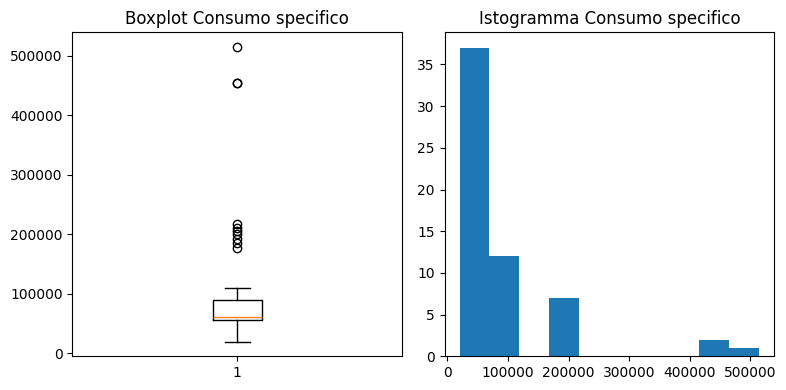

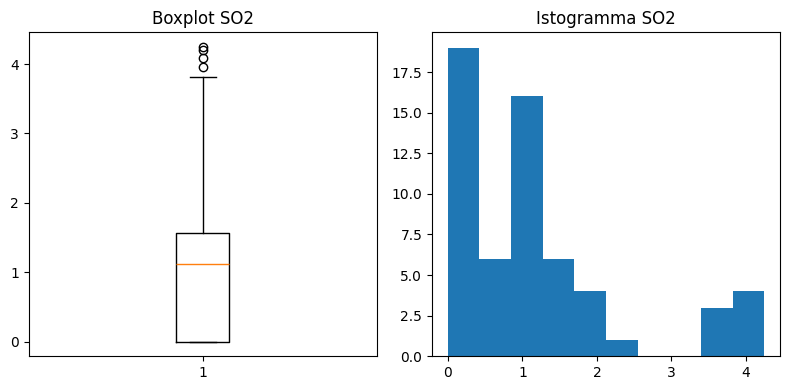

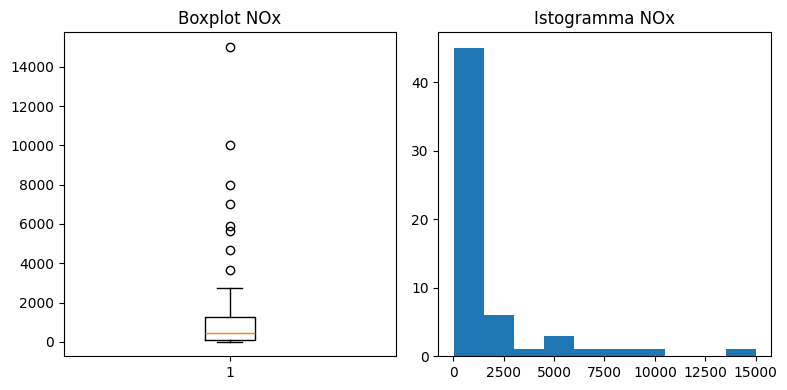

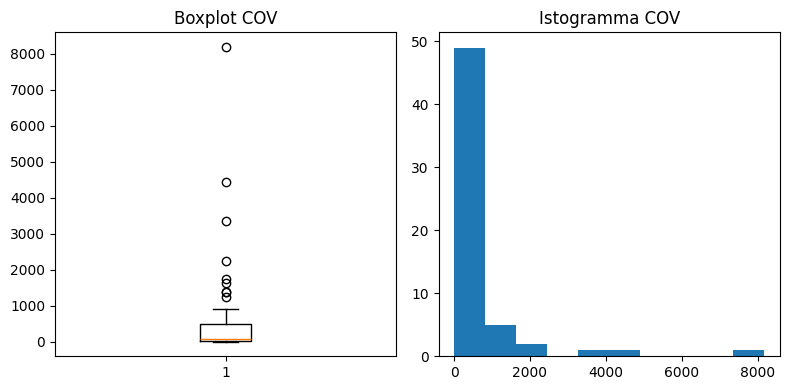

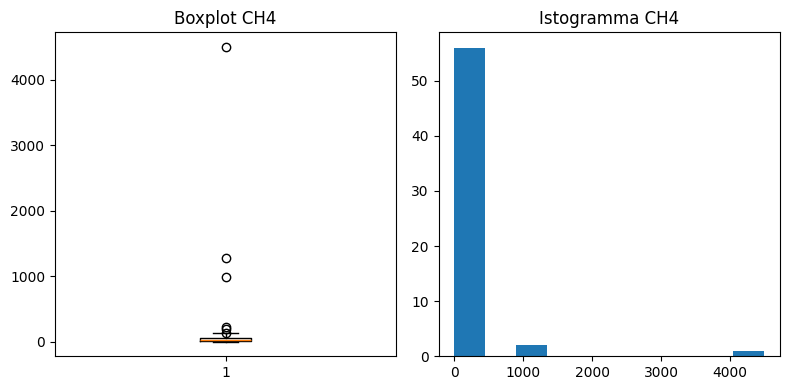

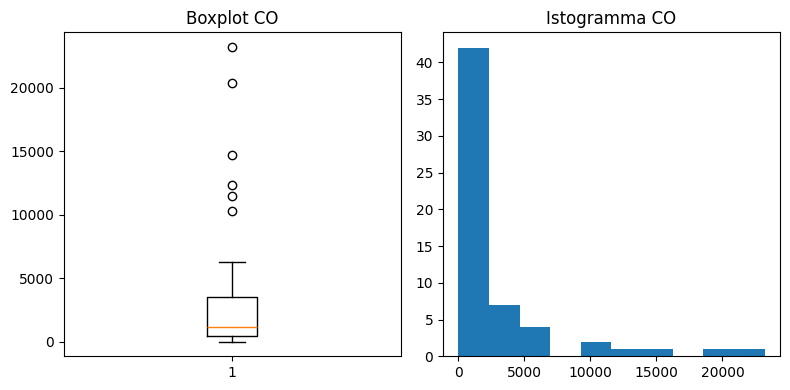

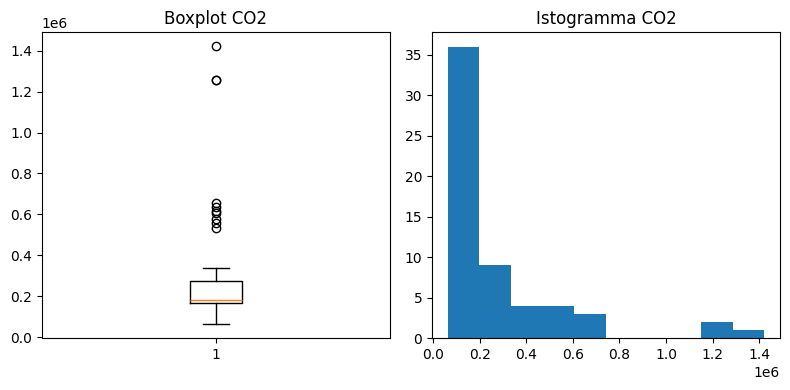

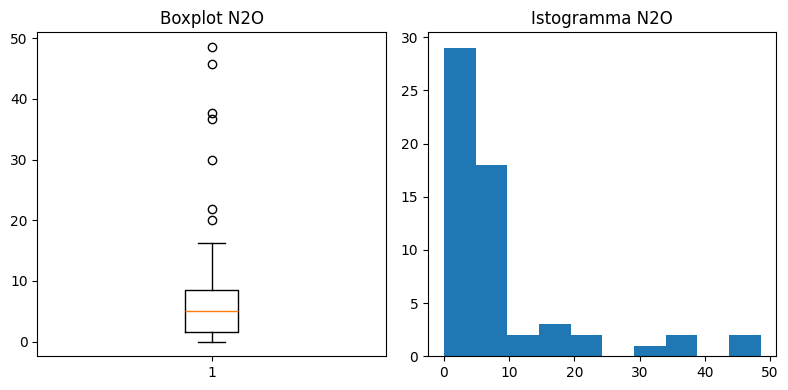

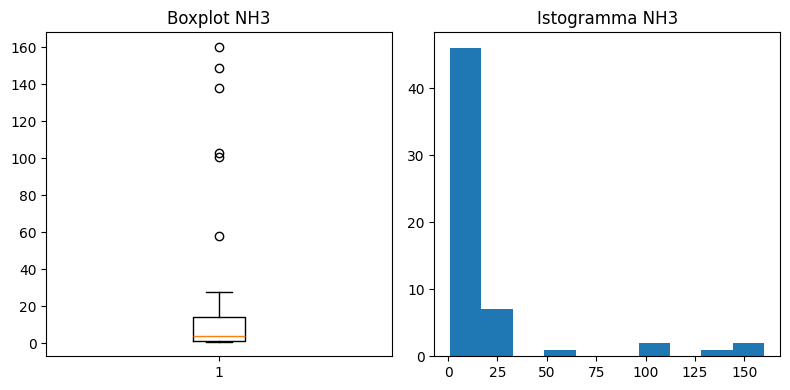

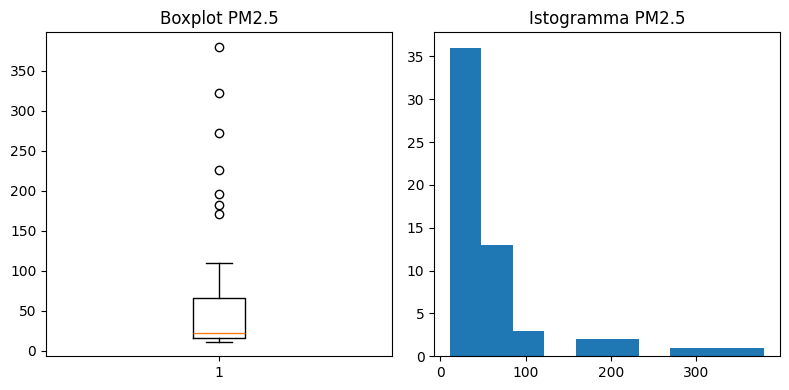

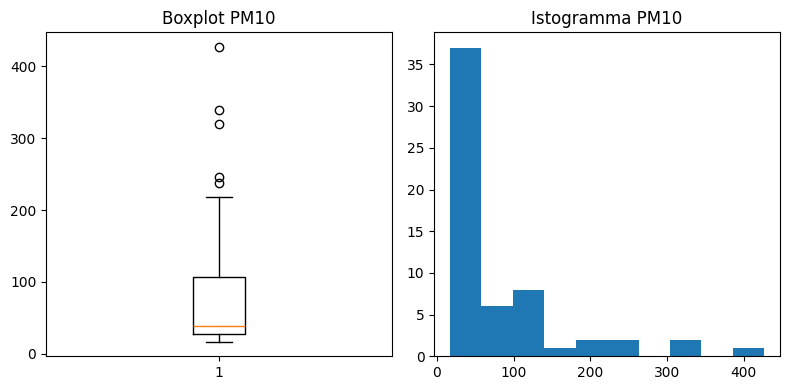

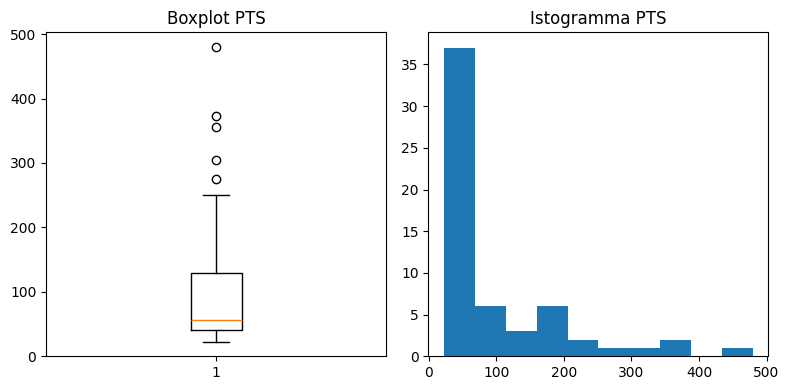

In [16]:
# Boxplot delle features
colEscluse = ['Settore', 'Combustibile', 'Tipo legislativo', 'Periodo']

for i, col in enumerate(df.columns):
  if col not in colEscluse:
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))
        axs[0].boxplot(df[col])
        axs[0].set_title(f"Boxplot {col}")
        axs[1].hist(df[col])
        axs[1].set_title(f"Istogramma {col}")
        plt.tight_layout()
        plt.show()

Data la presenza di veicoli di varie dimensioni e pesi risulta comunque normale la presenza di consumi anche fuori dalla media, quindi non li considerermo dati **anomali**; li analizzeremo comunque per comprendere meglio la variabilità del dataset.

Data la grande differenza tra i settori, abbiamo deciso di separare le categorie di veicoli ed eseguire le analisi separatamente per ognuno, per poi andare a confrontare i risultati successivamente.


In [17]:
# dividiamo il df
df_automobili = df[df['Settore'] == 'Automobili']
df_leggeri = df[df['Settore'] == 'Veicoli leggeri < 3.5 t']
df_pesanti = df[df['Settore'] == 'Veicoli pesanti > 3.5 t e autobus']
df_ciclomotori = df[df['Settore'] == 'Ciclomotori (< 50 cm3)']
df_motocicli = df[df['Settore'] == 'Motocicli (> 50 cm3)']

df_automobili.describe()

Consumo specifico        SO2          NOx          COV         CH4  \
count          21.000000  21.000000    21.000000    21.000000   21.000000   
mean        57994.024666   0.761382   515.064410   234.334231   23.974756   
std          2881.223535   0.553594   631.854241   441.269646   27.411745   
min         51454.527767   0.000000    26.298958     3.278457    0.517091   
25%         56775.798279   0.000000    65.561639    11.126189   11.285951   
50%         57539.715710   1.116467   358.630231    32.300717   17.541094   
75%         59429.357610   1.147106   687.969094   159.316726   24.151833   
max         63785.518831   1.242562  2344.039021  1620.773665  122.076129   

                 CO            CO2        N2O         NH3       PM2.5  \
count     21.000000      21.000000  21.000000   21.000000   21.000000   
mean    1851.185695  174933.050992   5.663521   20.552376   34.088850   
std     2997.895547    9799.036247   5.110732   36.719330   48.211254   
min       47.927627  154865.393037   0.000000    0.994975   14.400368   
25%      321.815604  168258.594345   1.127729    1.899104   14.865612   
50%      507.240077  174355.865318   4.061569   10.048268   15.565311   
75%     2068.050436  182673.617018   7.984609   21.035991   16.259816   
max    12362.960114  191998.882606  19.992090  148.842319  226.099925   

             PM10         PTS  
count   21.000000   21.000000  
mean    45.546238   58.581961  
std     48.211254   48.211254  
min     25.857756   38.893479  
25%     26.323001   39.358724  
50%     27.022700   40.058423  
75%     27.717205   40.752928  
max    237.557314  250.593037

In [18]:
df_leggeri.describe()

Consumo specifico        SO2          NOx          COV         CH4  \
count          21.000000  21.000000    21.000000    21.000000   21.000000   
mean        77990.493341   1.045913   699.970869   283.655019   33.158695   
std         18458.060266   0.826907   805.298492   557.132650   31.351260   
min         57786.033768   0.000000    19.393293     0.041421    0.604121   
25%         62362.169335   0.000000    70.270997    18.273734   11.659578   
50%         77447.175113   1.453626   320.249988    38.896371   24.064496   
75%         88353.998387   1.588216  1048.428716   151.889797   52.029759   
max        109190.847175   2.138133  2748.552881  2226.889583  126.887059   

                 CO            CO2        N2O         NH3       PM2.5  \
count     21.000000      21.000000  21.000000   21.000000   21.000000   
mean    3022.395515  234122.551244   8.956724   22.165216   48.607510   
std     5318.458578   62952.800577  10.731589   39.378232   69.014554   
min        0.402021  164361.628149   0.000000    0.960116   20.540714   
25%      483.168021  175440.217766   1.292754    0.999950   20.996449   
50%      554.258058  231984.013289   5.434337    8.892101   21.736351   
75%     3517.240647  264624.958354   8.446314   19.758849   22.002427   
max    23201.747257  340395.886193  37.709220  160.148587  322.145651   

             PM10         PTS  
count   21.000000   21.000000  
mean    65.735835   82.346540  
std     69.061238   69.076432  
min     37.442854   53.980031  
25%     37.853643   54.451599  
50%     38.930245   55.601230  
75%     39.058212   55.696673  
max    339.386035  356.032945

Per una ricerca più approfondita e consapevole dei dati anomali abbiamo stampato separatamente, per ogni features numerica, tutti gli istogrammi dei settori.

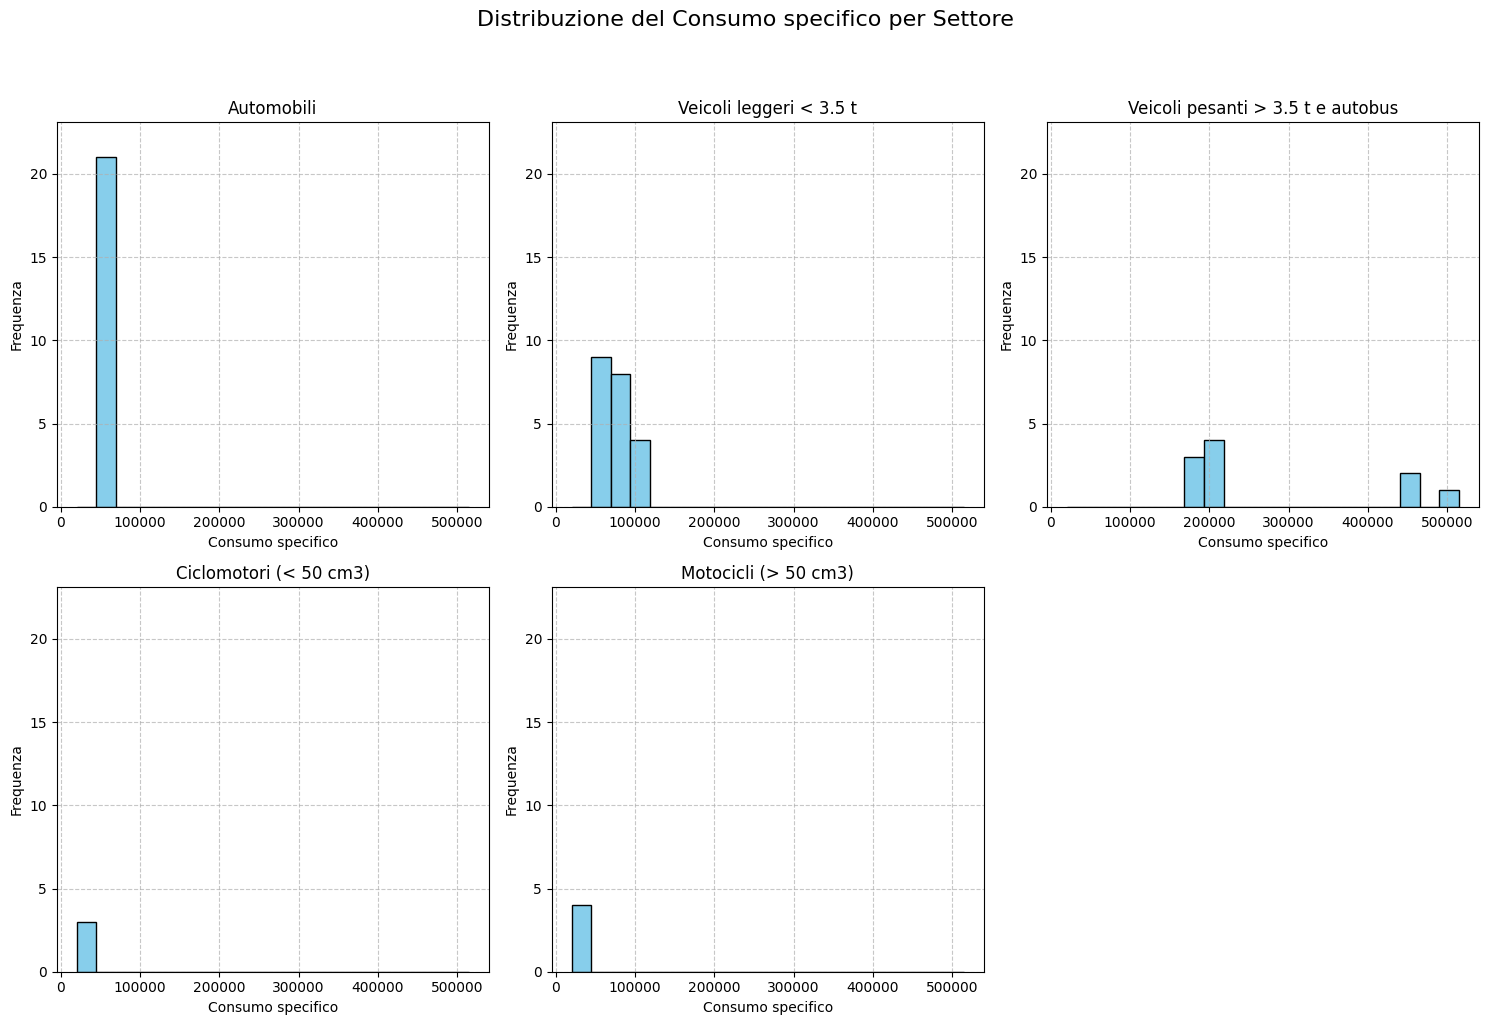

In [19]:
# scegliamo i dati
colonna_da_confrontare = 'Consumo specifico'
settori_unici = df['Settore'].unique()
n_bins = 20

# definiamo il minimo e massimo
x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05
y_max_global = 0

# cicla sui settori e crea l'istogramma
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

# estetica del grafico
y_max_padded = y_max_global * 1.10
n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# crea i grafici
for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]
    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))
    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)
    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# inserisce nella griglia i diversi istogrammi per il confronto
for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

# stampa dei grafici
plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Come ci aspettavamo, dal grafico si può notare come i veicoli più leggeri consumino di meno. Ergo, il peso e il consumo sono correlati.

Adesso rieseguiamo lo stesso codice per tutte le features.

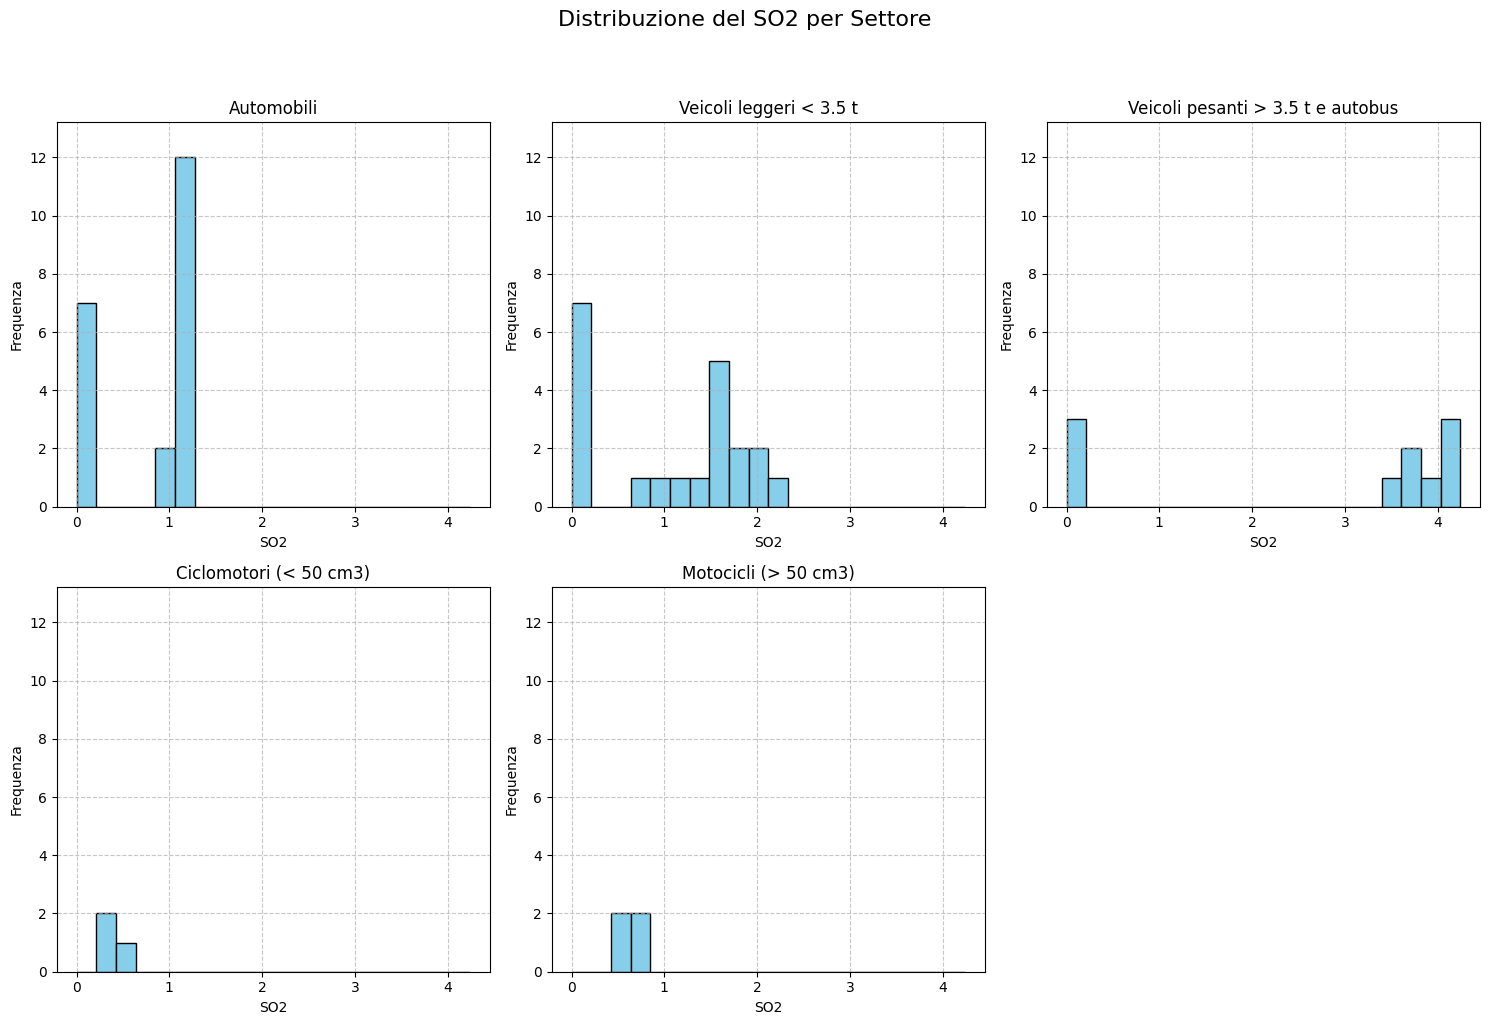

In [20]:
colonna_da_confrontare = 'SO2'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

I veicoli che non produzono So2 sono tutti a metano e metano/GPL, questo dimostra che non sono outliers.

In [21]:
df[df['SO2'] == 0]

Settore Combustibile  \
14                         Automobili   metano/GPL   
15                         Automobili   metano/GPL   
16                         Automobili   metano/GPL   
17                         Automobili   metano/GPL   
18                         Automobili   metano/GPL   
19                         Automobili   metano/GPL   
20                         Automobili   metano/GPL   
35            Veicoli leggeri < 3.5 t   metano/GPL   
36            Veicoli leggeri < 3.5 t   metano/GPL   
37            Veicoli leggeri < 3.5 t   metano/GPL   
38            Veicoli leggeri < 3.5 t   metano/GPL   
39            Veicoli leggeri < 3.5 t   metano/GPL   
40            Veicoli leggeri < 3.5 t   metano/GPL   
41            Veicoli leggeri < 3.5 t   metano/GPL   
49  Veicoli pesanti > 3.5 t e autobus       metano   
50  Veicoli pesanti > 3.5 t e autobus       metano   
51  Veicoli pesanti > 3.5 t e autobus       metano   

                 Tipo legislativo                     Periodo  \
14                         Euro 0                  < 01/01/93   
15            Euro 1 - 91/441/EEC  da 01/01/1993 a 31/12/1996   
16              Euro 2 - 94/12/EC  da 01/01/1997 a 31/12/2000   
17   Euro 3 - 98/69/EC Stage 2000  da 01/01/2001 a 31/12/2005   
18   Euro 4 - 98/69/EC Stage 2005  da 01/01/2006 a 31/12/2010   
19                         Euro 5  da 01/01/2011 a 31/08/2015   
20                         Euro 6               da 01/09/2015   
35                   Conventional                  < 30/06/93   
36             Euro 1 - 93/59/EEC  da 01/10/1994 a 30/09/1998   
37              Euro 2 - 96/69/EC  da 01/10/1998 a 31/12/2000   
38   Euro 3 - 98/69/EC Stage 2000  da 01/01/2001 a 31/12/2005   
39   Euro 4 - 98/69/EC Stage 2005  da 01/01/2006 a 31/12/2010   
40           Euro 5 - EC 715/2007  da 01/01/2011 a 31/08/2015   
41           Euro 6 - EC 715/2007               da 01/09/2015   
49  Euro II - 91/542/EEC Stage II  da 01/10/1996 a 01/10/2000   
50   Euro III - 1999/96/EC step 1  da 01/01/2001 a 31/12/2004   
51                            EEV              da 01/01/2008    

    Consumo specifico  SO2           NOx          COV          CH4  \
14       57337.892023  0.0   2344.039021  1234.362835    54.255458   
15       56775.798279  0.0    442.365268   679.352418    59.311450   
16       56758.031391  0.0    168.583925   166.510925    23.464291   
17       57588.020428  0.0     96.517862    32.372870    23.811973   
18       56425.117660  0.0     65.561639    32.300717    11.377669   
19       56787.629982  0.0     35.210693    20.610608    15.711499   
20       56960.582902  0.0     39.774286    21.904611    17.775603   
35       58437.096716  0.0   2249.155288  1388.023057    57.386697   
36       57786.033768  0.0    447.730399   712.755905    63.385974   
37       59726.728960  0.0    184.806929   170.018533    41.845850   
38       62362.169335  0.0     97.909288    18.273734    52.029759   
39       60684.186758  0.0     70.270997    36.708329    44.262919   
40       62929.229650  0.0     37.073145    38.273469    66.146857   
41       63095.567763  0.0     42.002889    38.896371    67.707364   
49      515000.001312  0.0  15000.000036   200.000001  4500.000009   
50      455000.000834  0.0  10000.000016    50.000000  1280.000000   
51      455000.000071  0.0   2500.000000    20.000000   980.000000   

             CO           CO2        N2O         NH3      PM2.5        PM10  \
14  6193.895110  1.701562e+05   0.818383    9.207847  15.559937   27.017326   
15  3541.099177  1.683296e+05  19.992090   21.035991  15.721836   27.179225   
16  2246.934699  1.682586e+05   9.914590   27.631730  15.731413   27.188802   
17  1202.088654  1.698301e+05   4.020699   12.585898  14.402678   25.860067   
18   478.707243  1.675728e+05   4.061569   11.740978  14.400770   25.858158   
19   579.456549  1.677578e+05   1.122635   10.056776  14.865612   26.323001   
20   507.240077  1.678033e+05   1.127729   10.048268  14.918868   26.376

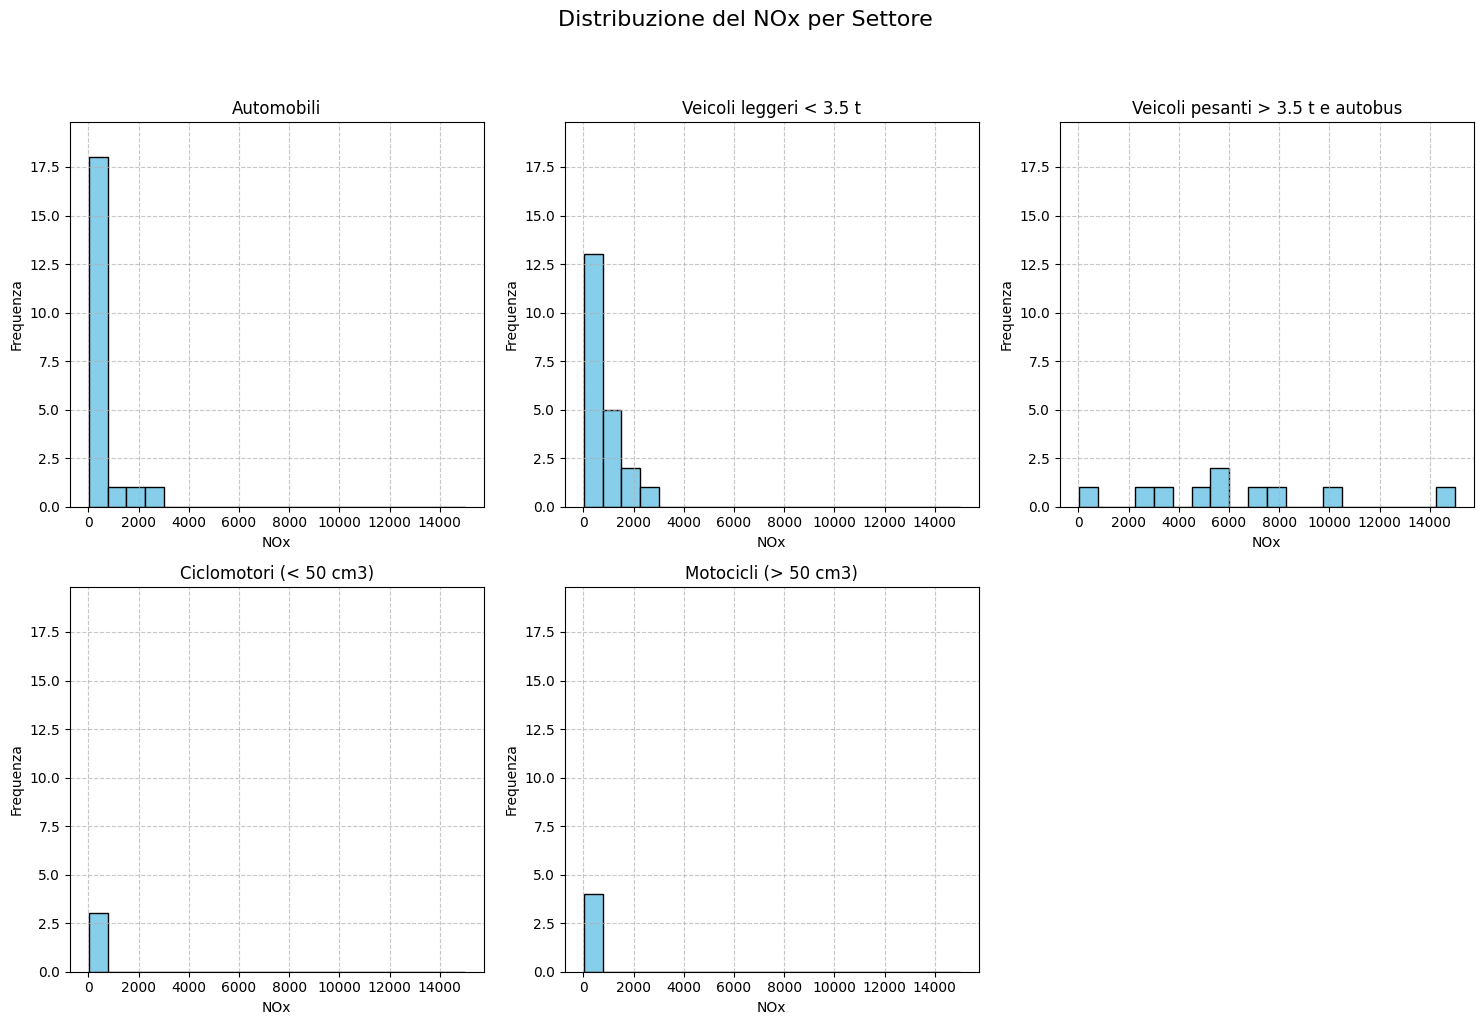

In [22]:
colonna_da_confrontare = 'NOx'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

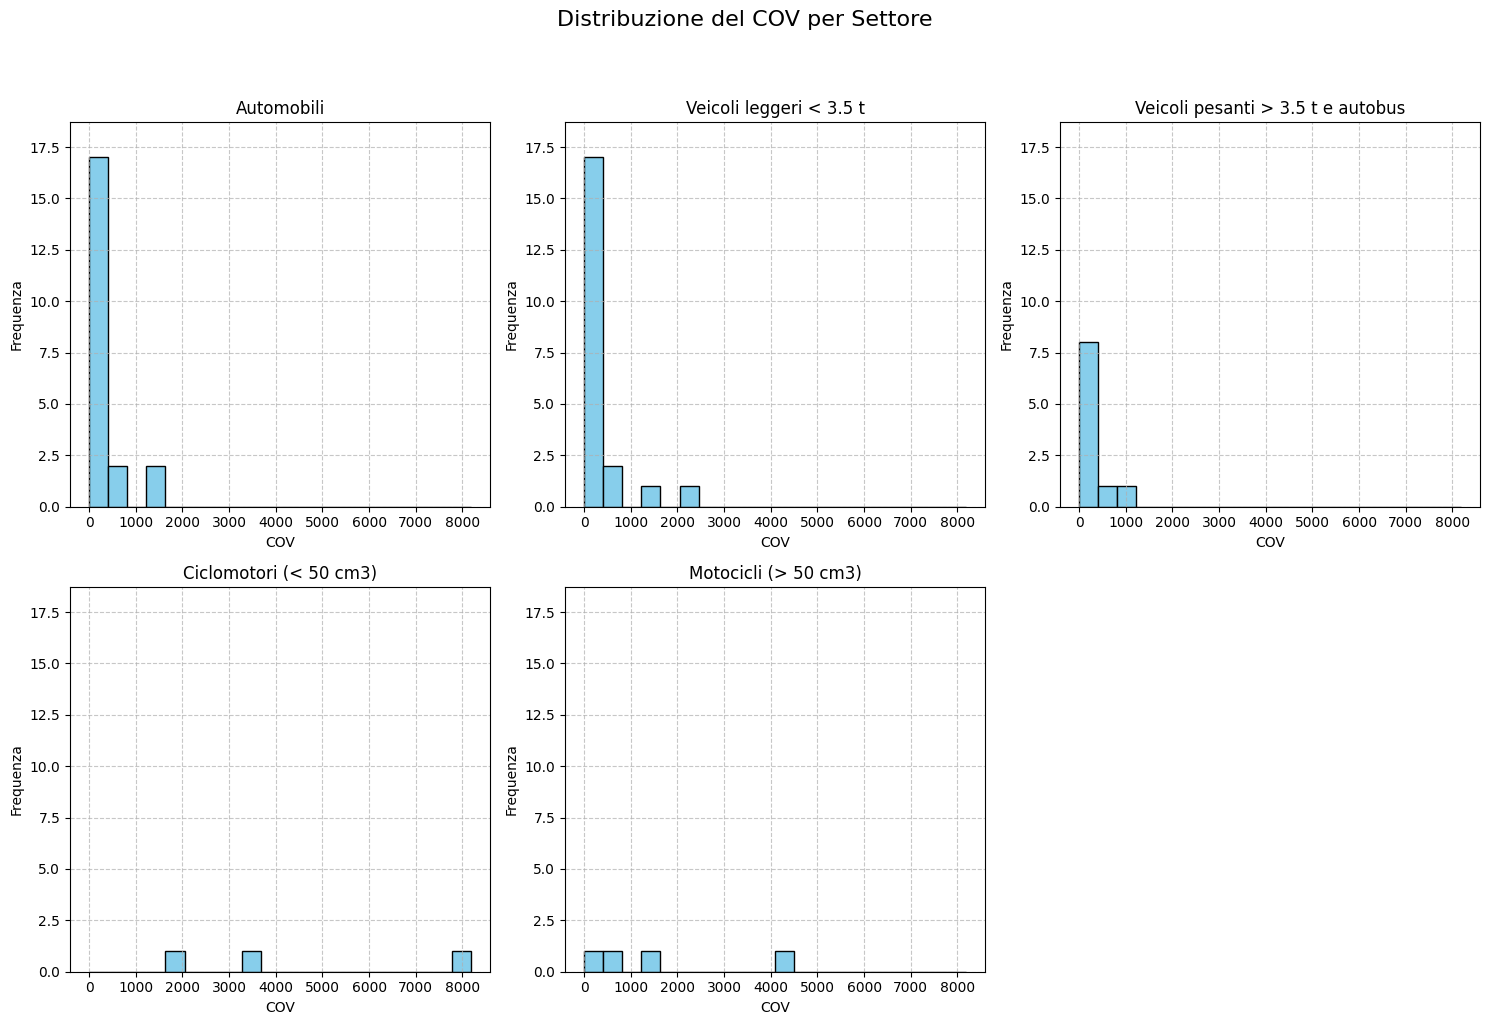

In [23]:
colonna_da_confrontare = 'COV'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

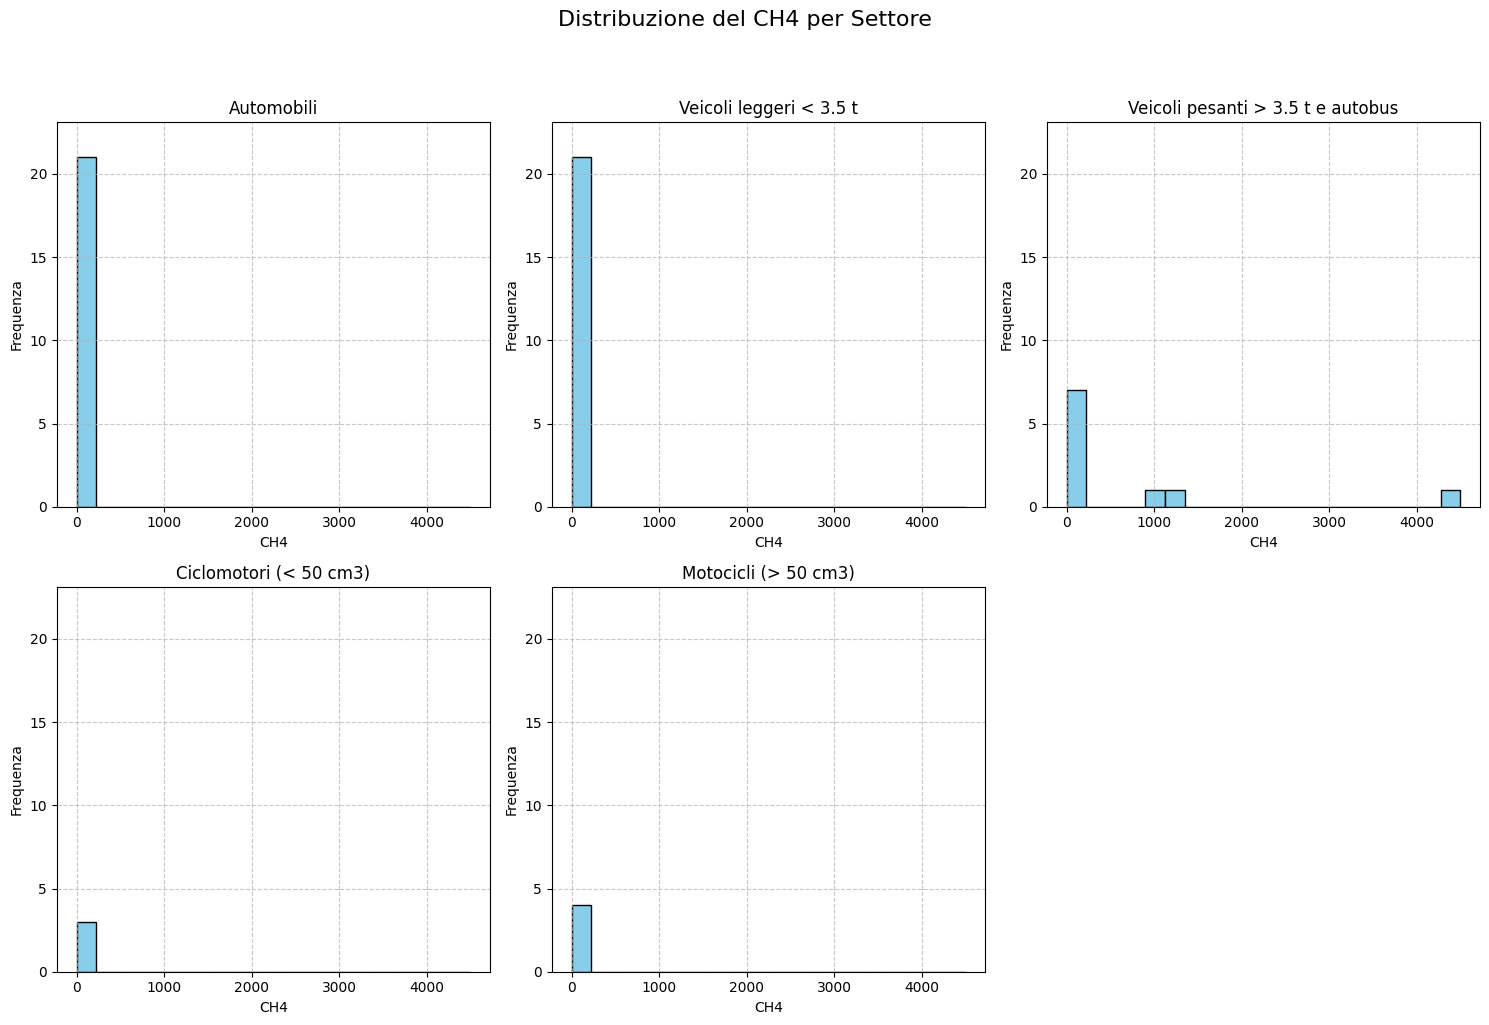

In [24]:
colonna_da_confrontare = 'CH4'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Notiamo un outliers, decidiamo quindi di verificare la realisticità dello stesso: essendo un veicolo pesante euro II, possiamo considerare normale questo tipo di consumi.

In [25]:
df[df['CH4'] > 4000]

Settore Combustibile  \
49  Veicoli pesanti > 3.5 t e autobus       metano   

                 Tipo legislativo                     Periodo  \
49  Euro II - 91/542/EEC Stage II  da 01/10/1996 a 01/10/2000   

    Consumo specifico  SO2           NOx         COV          CH4  \
49      515000.001312  0.0  15000.000036  200.000001  4500.000009   

             CO           CO2        N2O         NH3     PM2.5        PM10  \
49  2700.000004  1.421740e+06  16.251997  137.851997  64.94525  120.286363   

          PTS  
49  171.86817

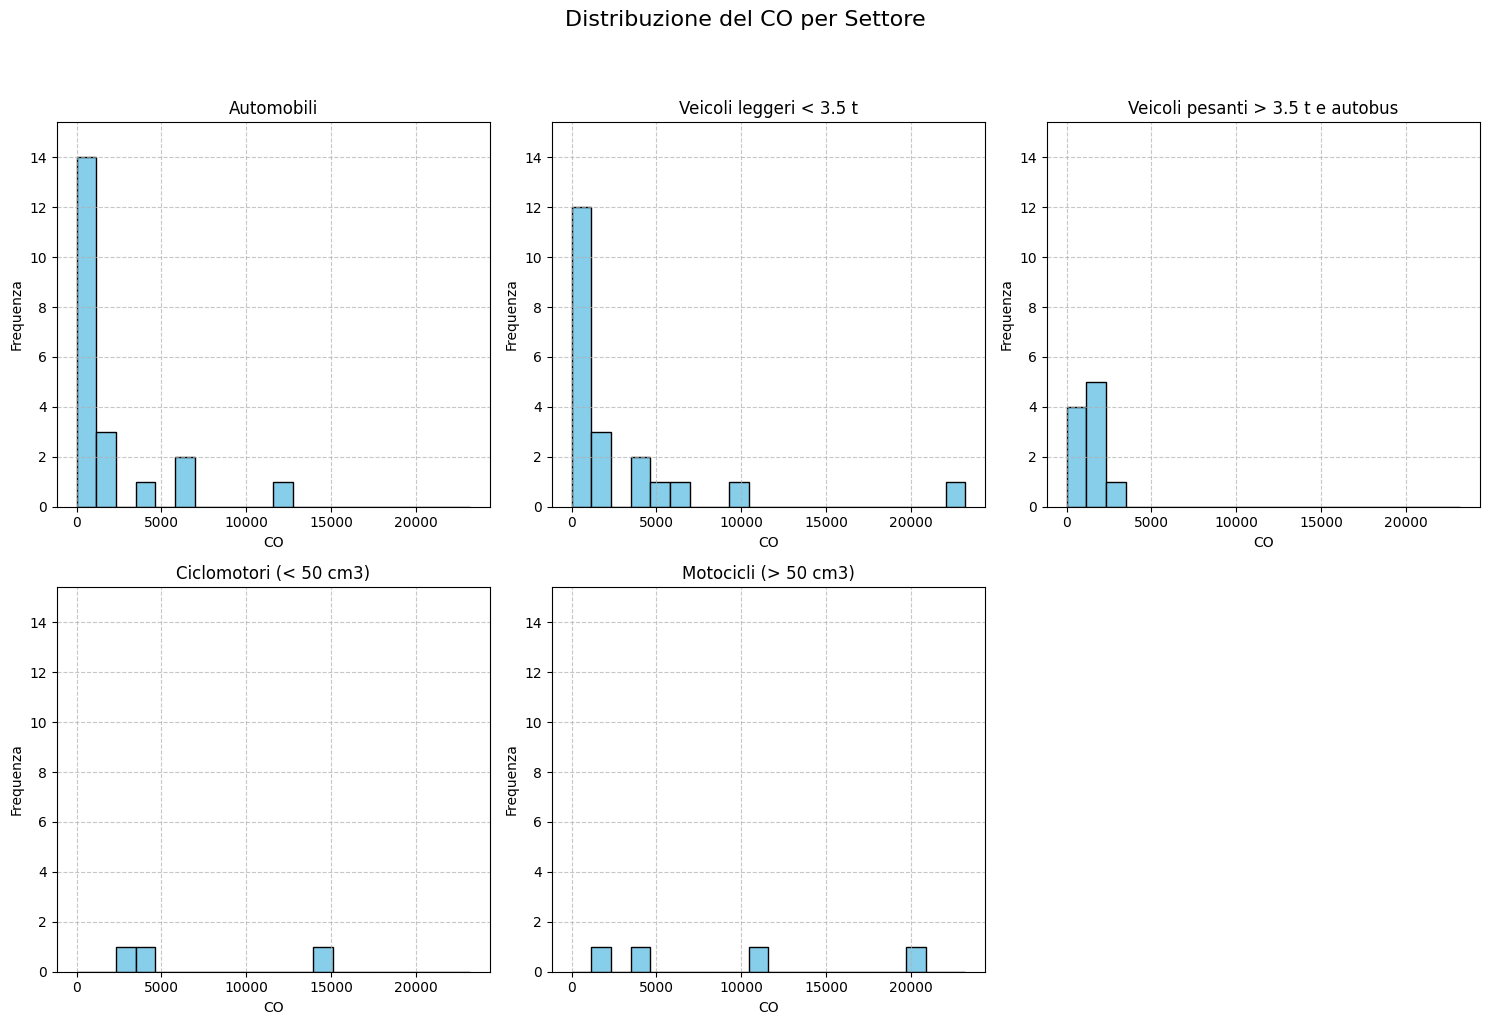

In [26]:
colonna_da_confrontare = 'CO'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Sono due veicoli di tipo legislativo "Conventional", quindi i dati rientrano nel consumo medio (secondo diverse fotni su internet).

In [27]:
df[df['CO'] > 20000]

Settore   Combustibile Tipo legislativo       Periodo  \
21  Veicoli leggeri < 3.5 t  benzina verde     Conventional    < 30/06/93   
55     Motocicli (> 50 cm3)  benzina verde     Conventional  < 31/12/1998   

    Consumo specifico       SO2          NOx          COV         CH4  \
21       92729.386970  1.453626  2748.552881  2226.889583  126.887059   
55       37186.820781  0.717799   194.675468  4425.277167  184.924519   

              CO            CO2       N2O       NH3      PM2.5       PM10  \
21  23201.747257  289007.568057  8.440705  1.994705  21.964017  39.058212   
55  20368.012479  116069.556596  1.998617  1.998617  80.603795  86.340093   

          PTS  
21  55.657628  
55  91.892683

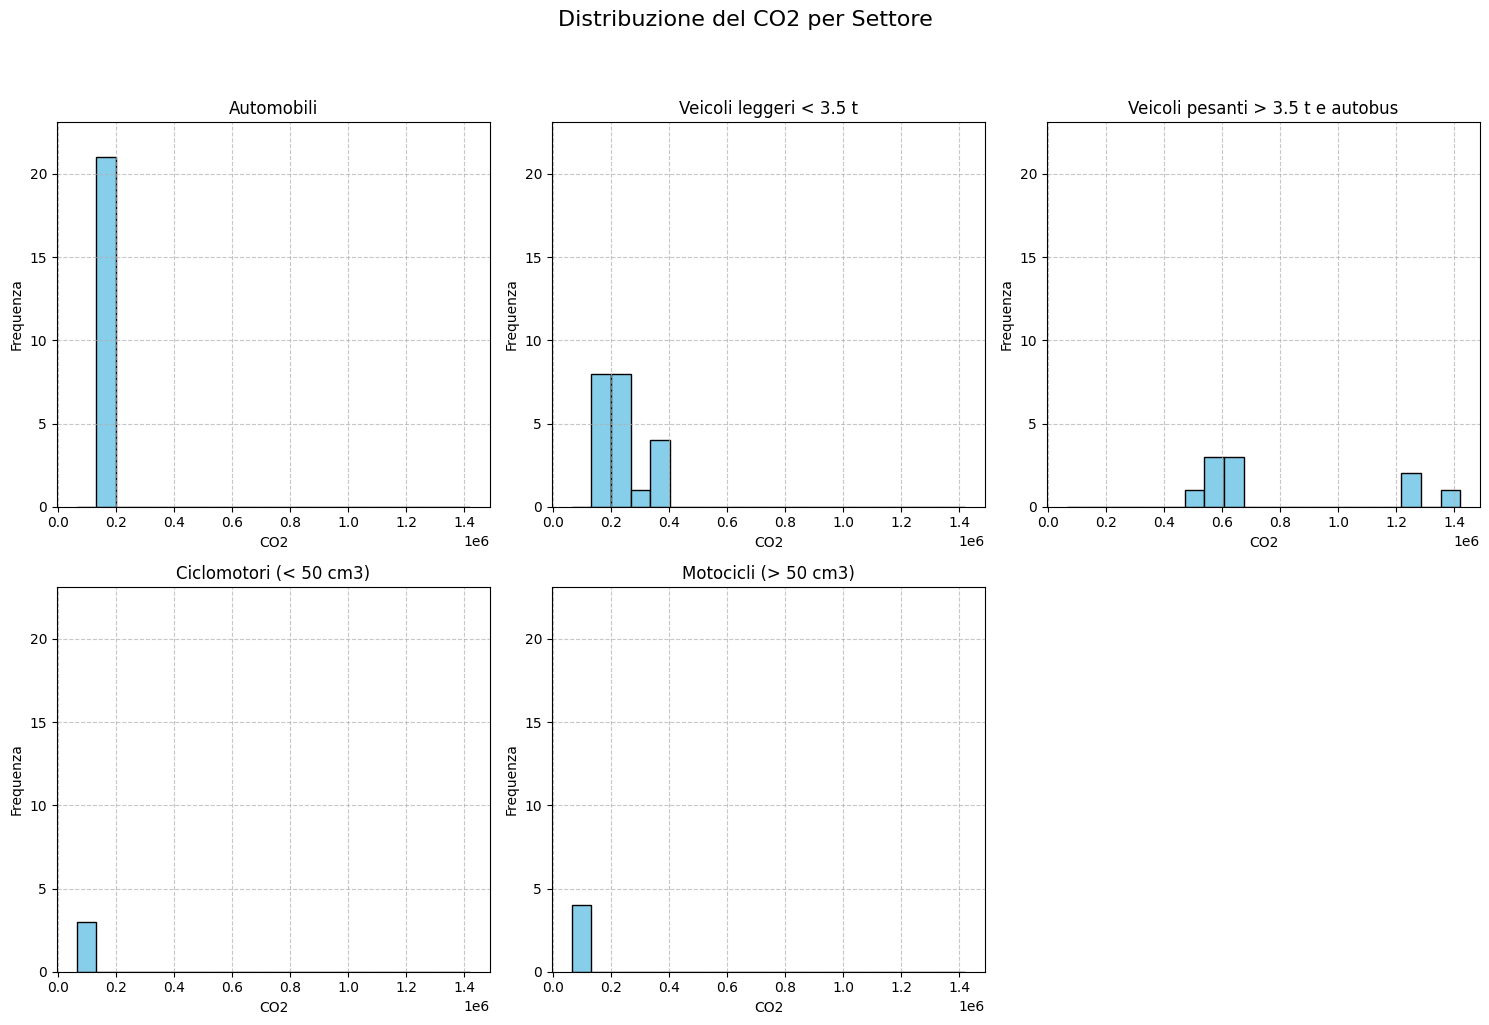

In [28]:
colonna_da_confrontare = 'CO2'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Il metano produce più CO2, soprattutto nei veicoli pesanti.

In [29]:
df[df['CO2'] > 1400000]

Settore Combustibile  \
49  Veicoli pesanti > 3.5 t e autobus       metano   

                 Tipo legislativo                     Periodo  \
49  Euro II - 91/542/EEC Stage II  da 01/10/1996 a 01/10/2000   

    Consumo specifico  SO2           NOx         COV          CH4  \
49      515000.001312  0.0  15000.000036  200.000001  4500.000009   

             CO           CO2        N2O         NH3     PM2.5        PM10  \
49  2700.000004  1.421740e+06  16.251997  137.851997  64.94525  120.286363   

          PTS  
49  171.86817

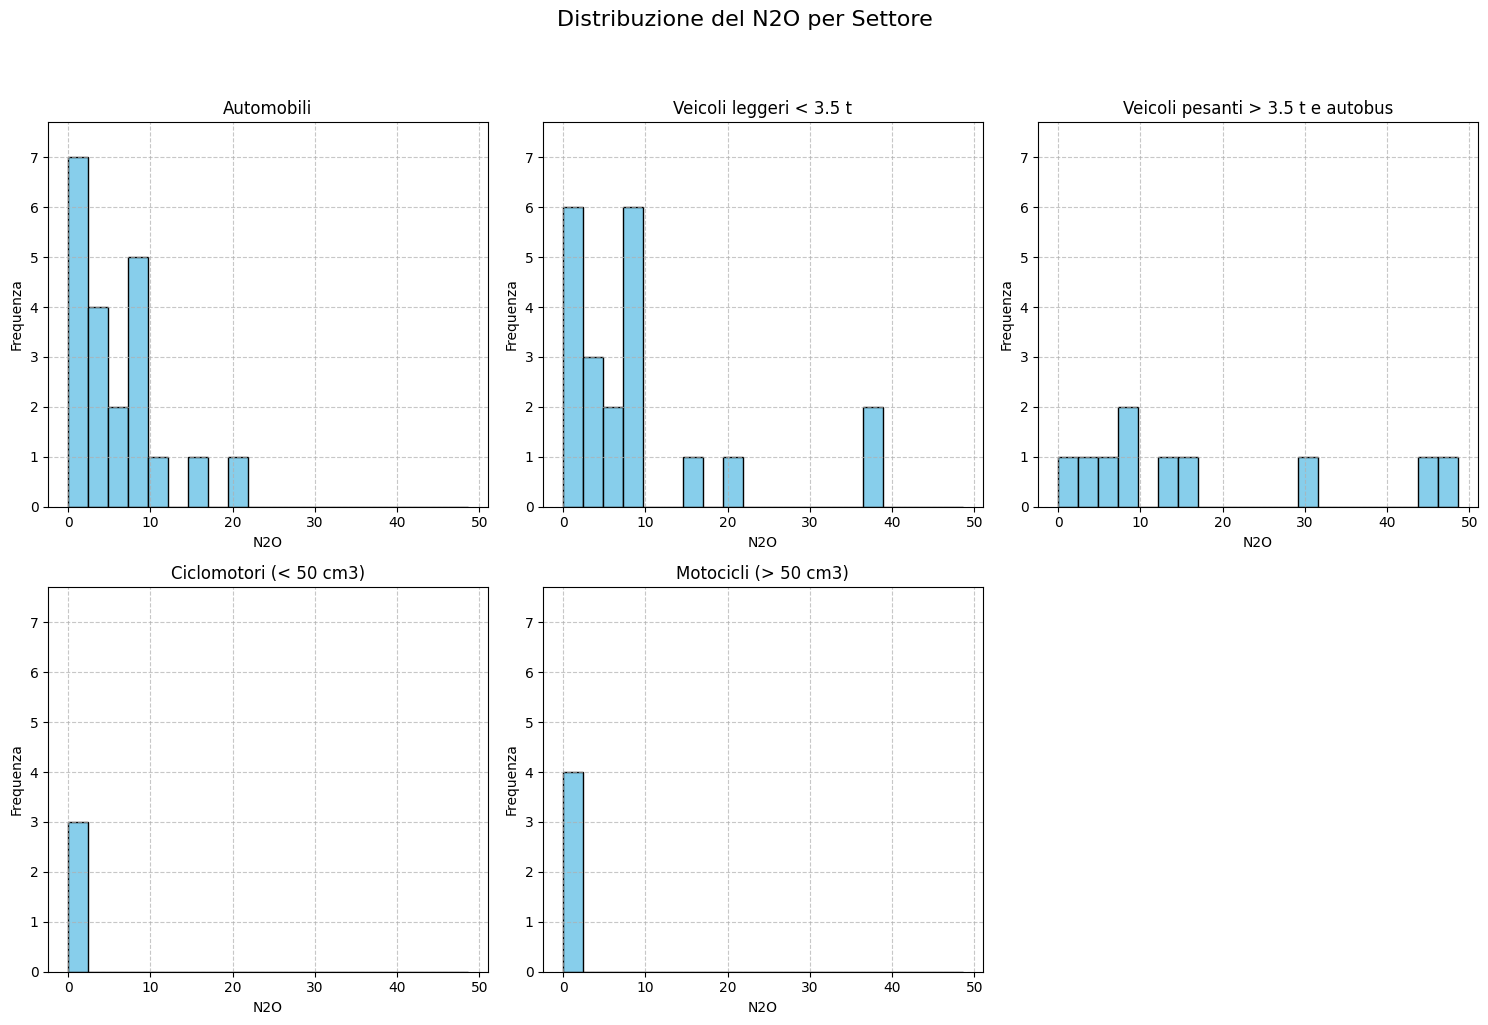

In [30]:
colonna_da_confrontare = 'N2O'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

È plausibile che i veicoli diesel più datati (classificati come "Conventional") abbiano valori di N₂O pari a zero nei dataset , per due motivi:
1. **Assenza di misurazioni storiche:** in passato, le emissioni di N₂O non erano sempre misurate o regolamentate
2. **Tecnologia del motore:** i motori diesel più vecchi potrebbero effettivamente produrre quantità trascurabili di N₂O rispetto ad altri inquinanti

In [31]:
df[df['N2O'] == 0]

Settore Combustibile Tipo legislativo     Periodo  \
7                Automobili       diesel           Euro 0  < 01/01/93   
28  Veicoli leggeri < 3.5 t       diesel     Conventional  < 30/06/93   

    Consumo specifico       SO2          NOx         COV        CH4  \
7        61422.101846  1.111859   687.969094  159.316726  18.755625   
28       88353.998387  1.718417  1939.077662  136.829032  20.249421   

             CO            CO2  N2O       NH3       PM2.5        PM10  \
7    661.636230  184608.272090  0.0  0.997168  226.099925  237.557314   
28  1222.760968  264624.958354  0.0  0.999280  322.145651  339.386035   

           PTS  
7   250.593037  
28  356.032945

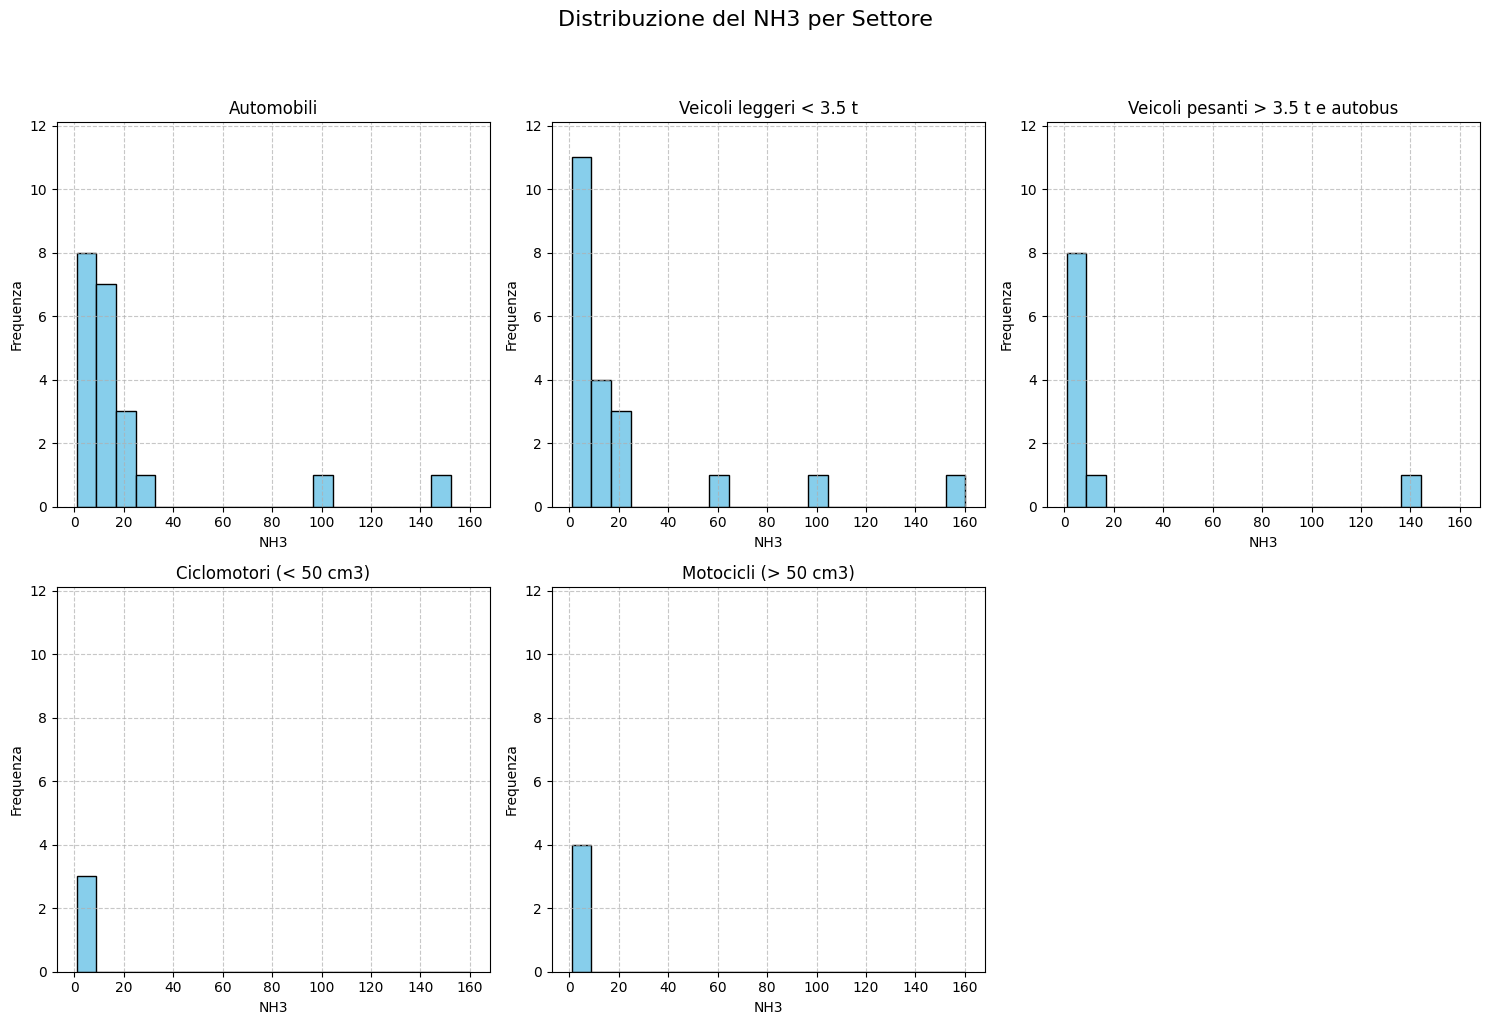

In [32]:
colonna_da_confrontare = 'NH3'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [33]:
df[df['NH3'] > 130]

Settore   Combustibile  \
2                          Automobili  benzina verde   
23            Veicoli leggeri < 3.5 t  benzina verde   
49  Veicoli pesanti > 3.5 t e autobus         metano   

                 Tipo legislativo                     Periodo  \
2               Euro 2 - 94/12/EC  da 01/01/1997 a 31/12/2000   
23              Euro 2 - 96/69/EC  da 01/10/1998 a 31/12/2000   
49  Euro II - 91/542/EEC Stage II  da 01/10/1996 a 01/10/2000   

    Consumo specifico       SO2           NOx         COV          CH4  \
2        56546.580118  1.125293    358.630231  157.147263    35.396946   
23      109190.190241  2.062525    320.249988   86.615200    35.676488   
49      515000.001312  0.000000  15000.000036  200.000001  4500.000009   

             CO           CO2        N2O         NH3      PM2.5        PM10  \
2   2068.050436  1.743559e+05   7.945214  148.842319  15.732021   27.189409   
23  5641.761418  3.403959e+05  37.709220  160.148587  21.963413   39.053373   
49  2700.000004  1.421740e+06  16.251997  137.851997  64.945250  120.286363   

           PTS  
2    40.225132  
23   55.651377  
49  171.868170

In questo caso, abbiamo tutti veicoli Euro II.      ervwewevwevqwevwe



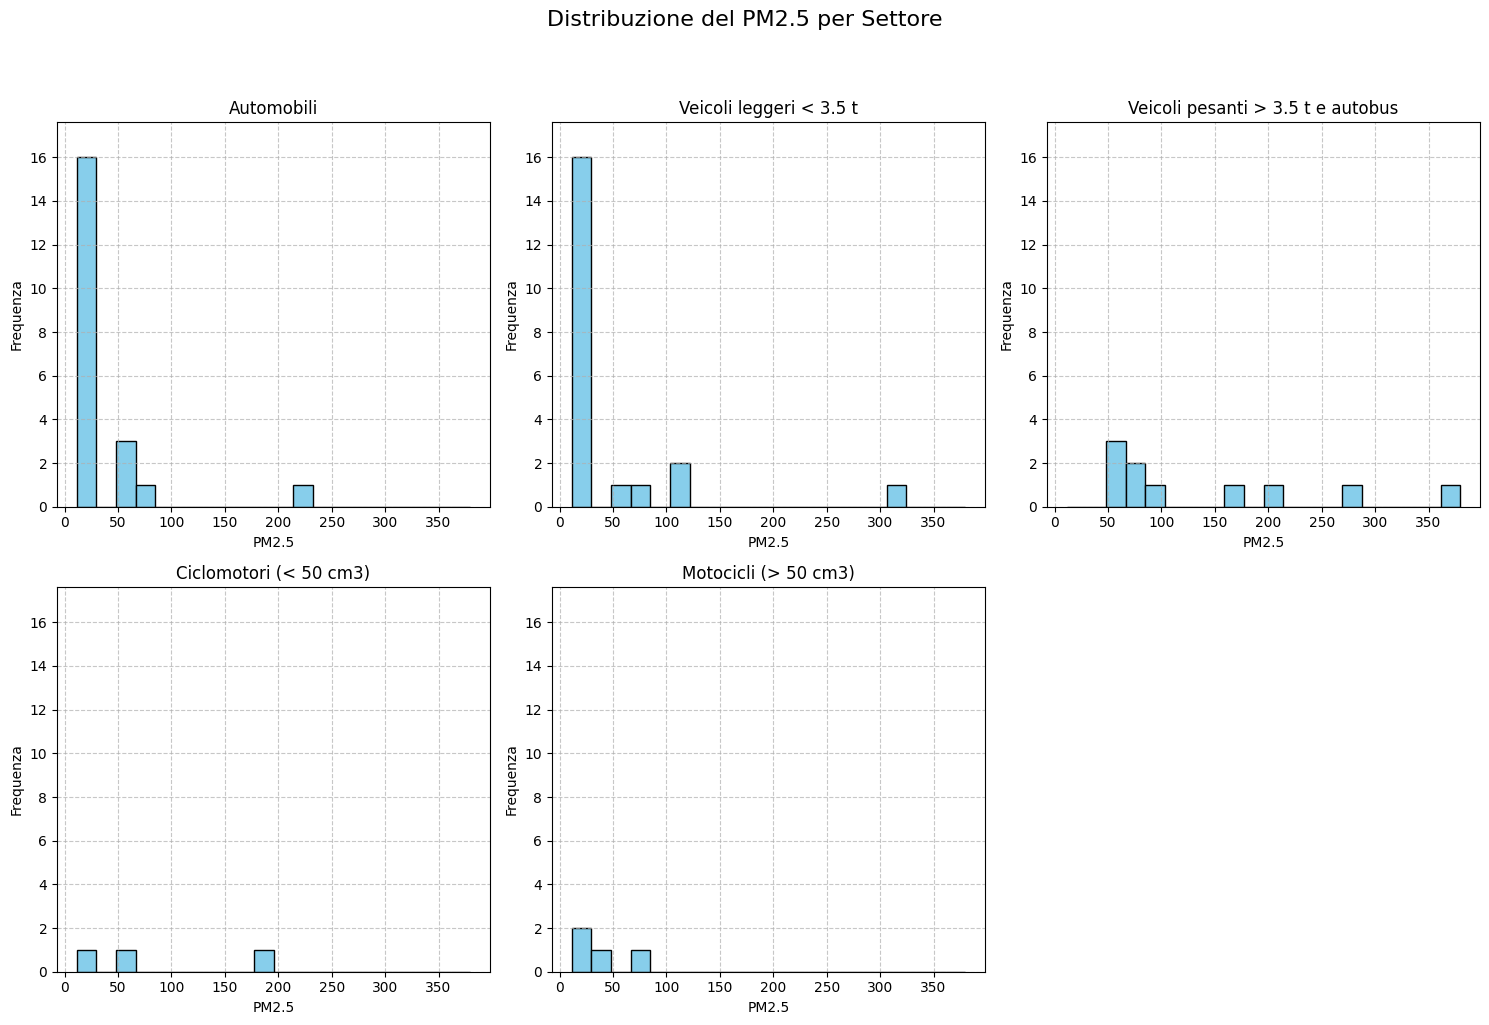

In [34]:
colonna_da_confrontare = 'PM2.5'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

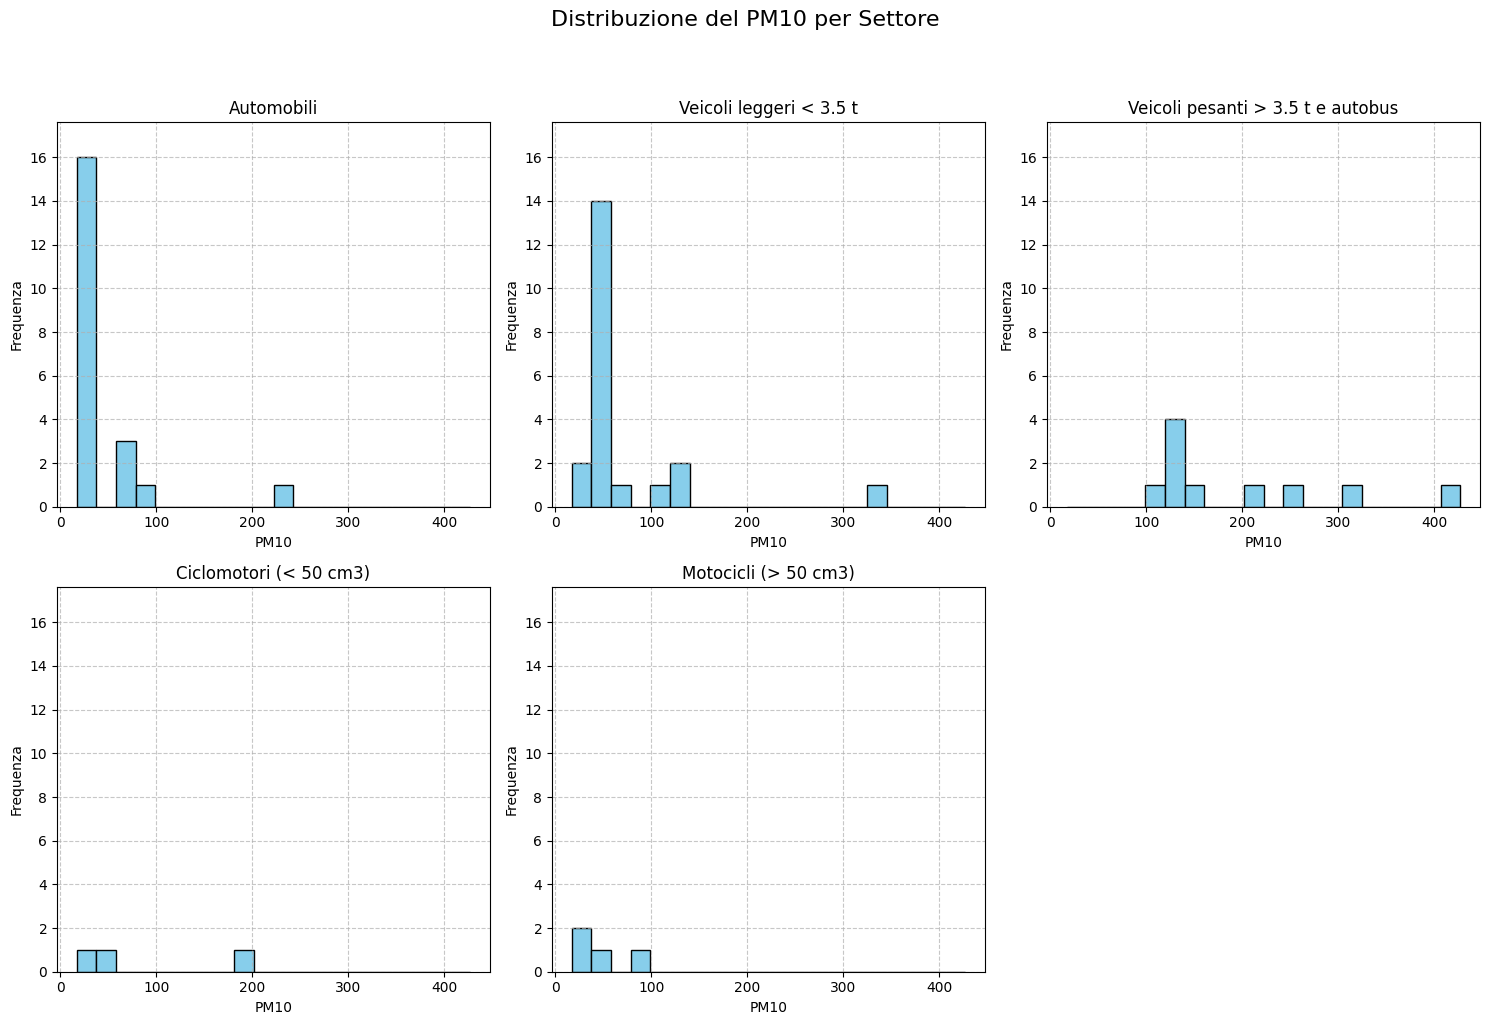

In [35]:
colonna_da_confrontare = 'PM10'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

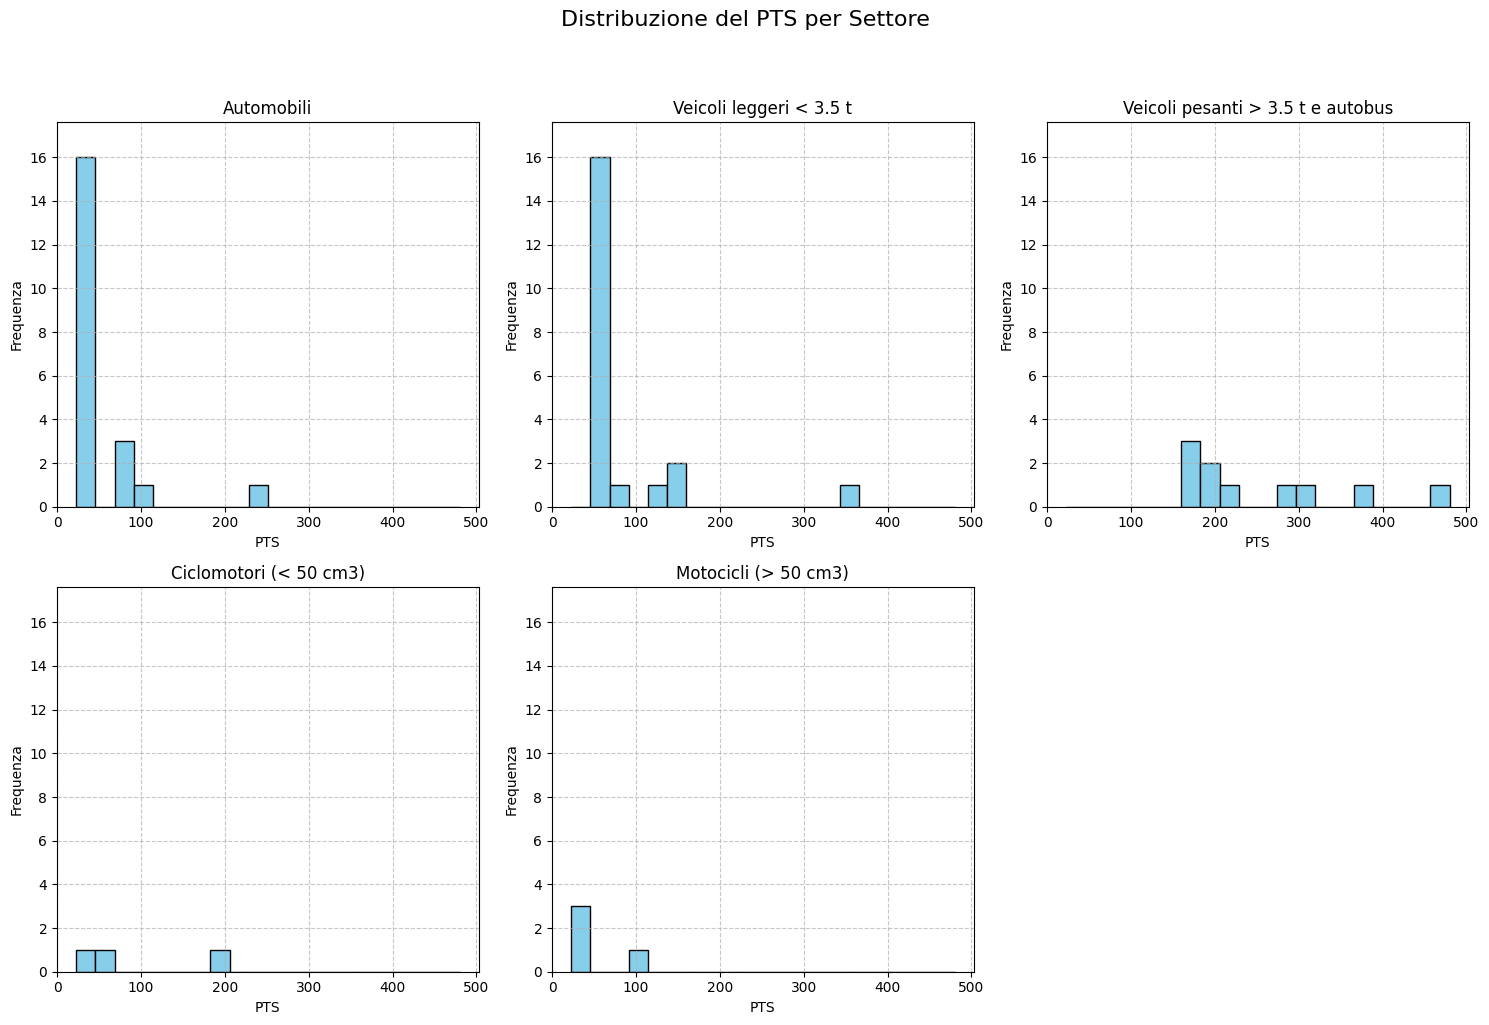

In [36]:
colonna_da_confrontare = 'PTS'
settori_unici = df['Settore'].unique()
n_bins = 20

x_min = df[colonna_da_confrontare].min()
x_max = df[colonna_da_confrontare].max()
x_range = x_max - x_min
x_min_padded = x_min - x_range * 0.05
x_max_padded = x_max + x_range * 0.05

y_max_global = 0
for settore in settori_unici:
    df_settore = df[df['Settore'] == settore]
    counts, bins = np.histogram(df_settore[colonna_da_confrontare], bins=n_bins, range=(x_min, x_max))
    current_y_max = counts.max()
    if current_y_max > y_max_global:
        y_max_global = current_y_max

y_max_padded = y_max_global * 1.10

n_cols = 3
n_rows = (len(settori_unici) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, settore in enumerate(settori_unici):
    df_settore = df[df['Settore'] == settore]

    axes[i].hist(df_settore[colonna_da_confrontare], bins=n_bins, edgecolor='black', color='skyblue',
                 range=(x_min, x_max))

    axes[i].set_xlim(x_min_padded, x_max_padded)
    axes[i].set_ylim(0, y_max_padded)


    axes[i].set_title(settore)
    axes[i].set_xlabel(colonna_da_confrontare)
    axes[i].set_ylabel('Frequenza')
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(settori_unici), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Distribuzione del {colonna_da_confrontare} per Settore', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Veicoli diversi con tipi legislativi e combustibili diversi possono produrre più o meno inquinanti, quindi non è possibile definire degli outliers specifici; e dato che il dataset è già ridotto, preferiamo mantere una ampia variabilità dei dati.

## CORRELAZIONE

Abbiamo proceduto a cercare le correlazioni tra le features nei vari tipi di settori, attraverso l'uso di heatmap.

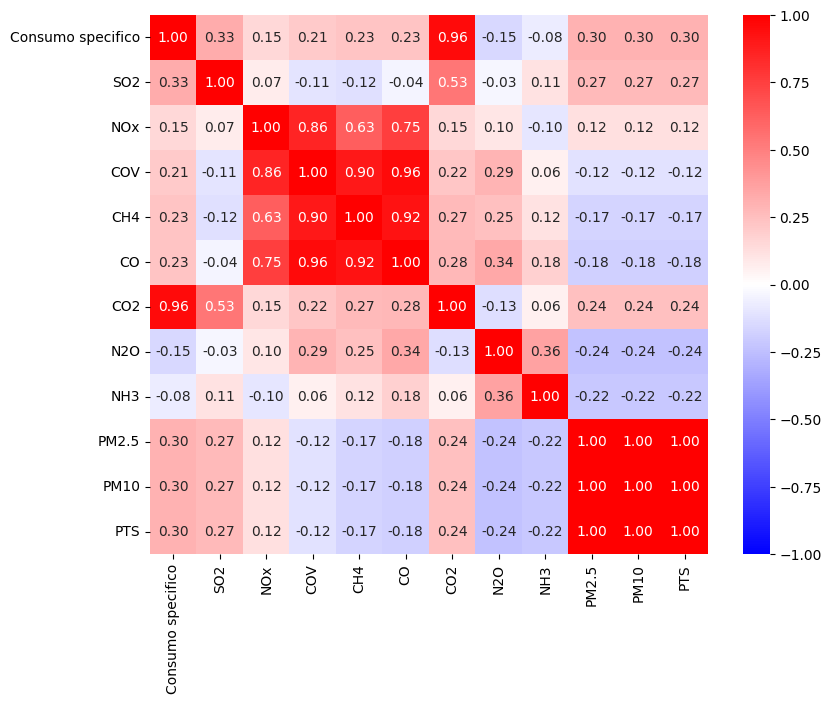

In [37]:
# Calcolo la correlazione tra le features (solo numeriche) nelle automobili
corr = df_automobili.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

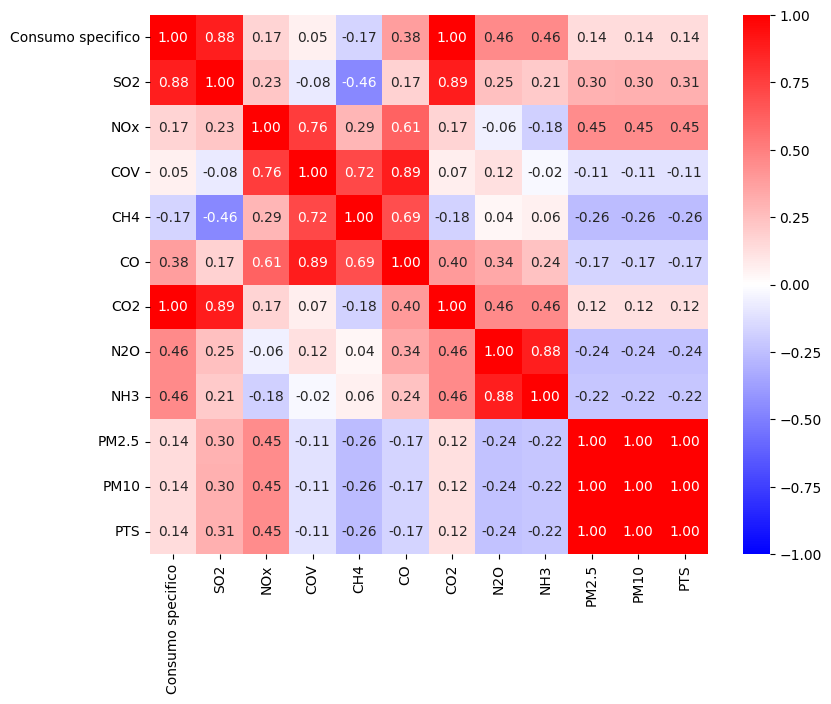

In [38]:
# Calcolo la correlazione tra le features (solo numeriche) nei veicoli leggeri
corr = df_leggeri.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

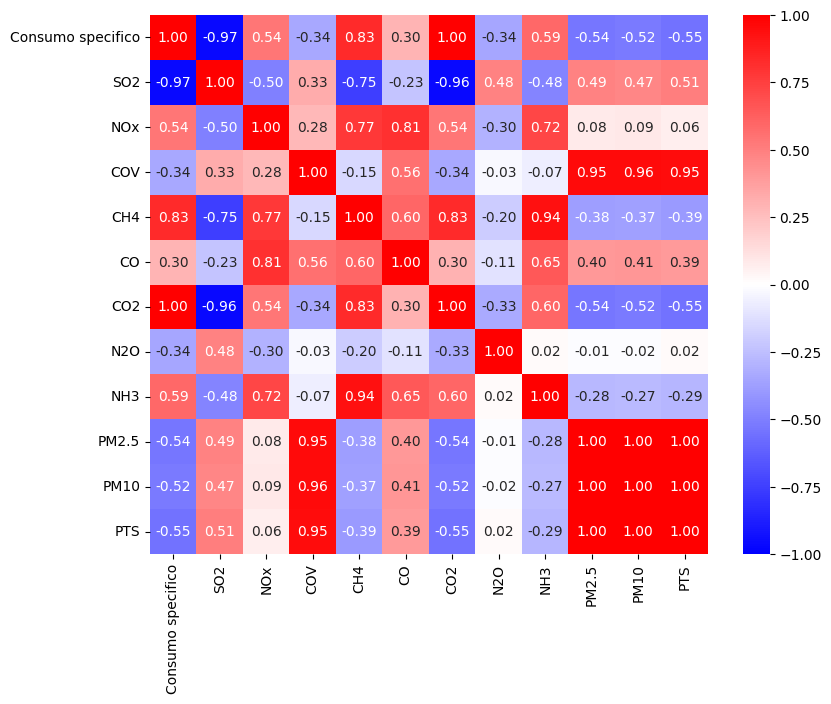

In [39]:
# Calcolo la correlazione tra le features (solo numeriche) nei veicoli pesanti
corr = df_pesanti.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

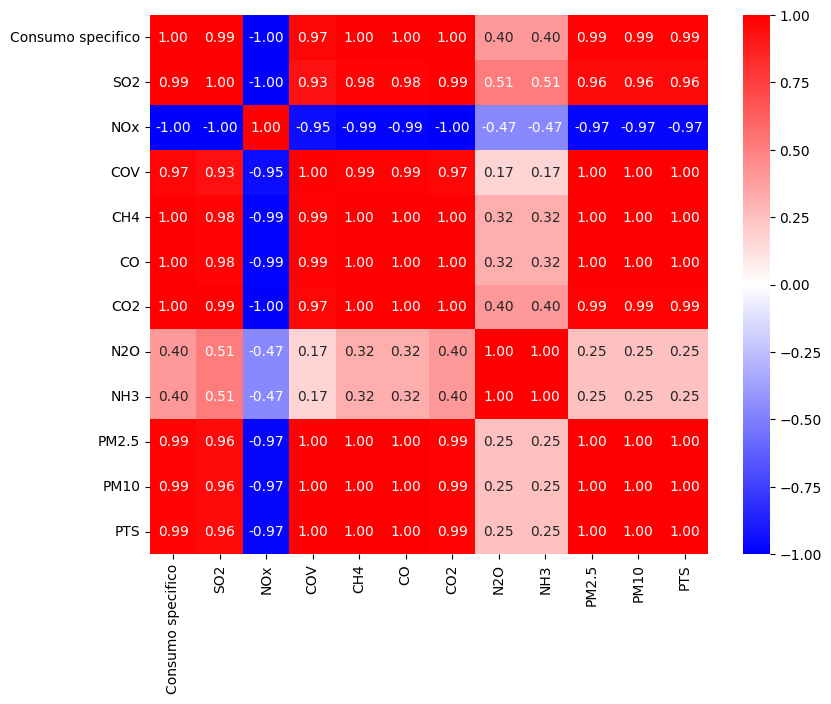

In [40]:
# Calcolo la correlazione tra le features (solo numeriche) nei ciclomotori
corr = df_ciclomotori.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

Da questo grafico possiamo notare che le correlazioni di NOx con le altre sostanze siano completamente, o quasi totalmente, inverse (-1.00). A livello chimico, ciò potrebbe derivare dalle reazioni presenti nei motori dei veicoli, in quanto NOx, reagendo, si consuma e aumenta la formazione degli altri agenti inquinanti: questo spiega perché al suo diminuire le altre sostanze invece aumentino.

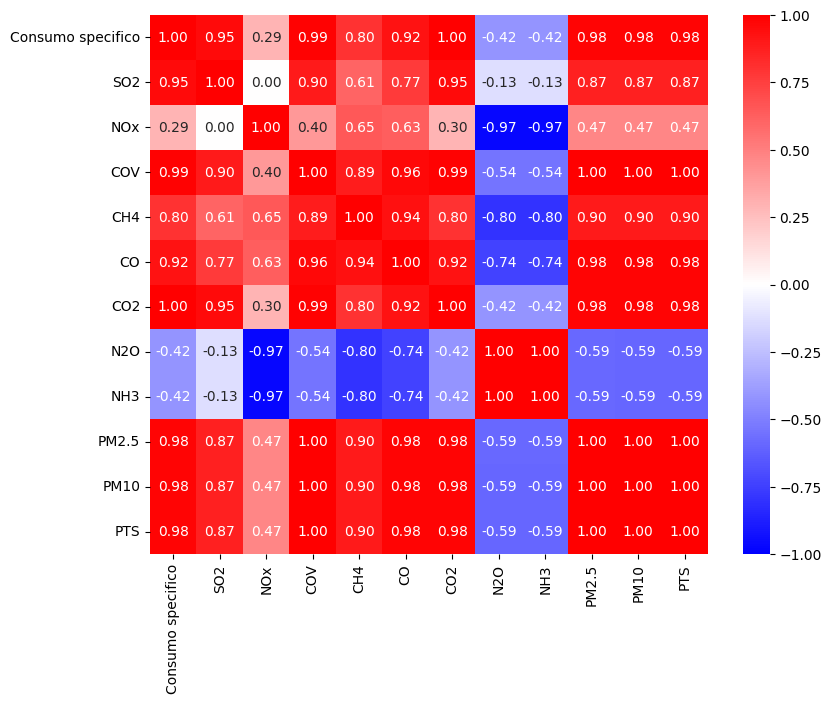

In [41]:
# Calcolo la correlazione tra le features (solo numeriche) nei motocicli
corr = df_motocicli.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

Come evidenziato sopra, all'interno dei motori avvengono reazioni chimiche che possono portare gli inquinanati a reagire tra loro.

Elementi come NH3 e N2O appartengano ai reagenti per la produzione di sostanze come i particolati (PM2.5, PM10 e PTS).

Abbiamo notato che indipendentemente dal tipo di veicolo ci sono forti correlazioni tra la produzione di CO2 e il consumo specifico e tra gli inquinanti PM2.5, PM10, PTS.
Questo indica che questo tipi di inquinanti non sono specifici per settore a differenza di altri come SO2 per i veicoli leggeri e il COV per i veicoli pesanti.

Abbiamo deciso anche di controllare le varie correlazioni tra le features e i diversi tipi di carburante. Per farlo, abbiamo suddiviso come prima il dataframe in base al combustibile e abbiamo creato le heatmap.

In [42]:
# dividiamo il df
df_benzinaverde = df[df['Combustibile'] == 'benzina verde']
df_diesel = df[df['Combustibile'] == 'diesel']
df_metanoGPL = df[df['Combustibile'] == 'metano/GPL']
df_metano = df[df['Combustibile'] == 'metano']

df_benzinaverde.head()

Settore   Combustibile              Tipo legislativo  \
0  Automobili  benzina verde                        Euro 0   
1  Automobili  benzina verde           Euro 1 - 91/441/EEC   
2  Automobili  benzina verde             Euro 2 - 94/12/EC   
3  Automobili  benzina verde  Euro 3 - 98/69/EC Stage 2000   
4  Automobili  benzina verde  Euro 4 - 98/69/EC Stage 2005   

                      Periodo  Consumo specifico       SO2          NOx  \
0                  < 01/01/93       61632.435413  1.204133  2084.048393   
1  da 01/01/1993 a 31/12/1996       59253.481071  1.140755   711.703829   
2  da 01/01/1997 a 31/12/2000       56546.580118  1.125293   358.630231   
3  da 01/01/2001 a 31/12/2005       57539.715710  1.147106    79.716127   
4  da 01/01/2006 a 31/12/2010       59429.357610  1.187123    50.254159   

           COV         CH4            CO            CO2        N2O  \
0  1620.773665  122.076129  12362.960114  190028.008697   8.179762   
1   588.338866   25.705812   5830.904280  182673.617018  15.460622   
2   157.147263   35.396946   2068.050436  174355.865318   7.945214   
3    15.488732   24.151833   1131.241819  177412.878088   2.582156   
4    10.406638   17.541094    362.634870  182827.674532   1.945418   

          NH3      PM2.5       PM10        PTS  
0    1.999326  15.565311  27.022700  40.058423  
1  102.897094  15.733231  27.190619  40.226342  
2  148.842319  15.732021  27.189409  40.225132  
3   23.055528  14.404072  25.861460  38.897183  
4   23.549106  14.400368  25.857756  38.893479

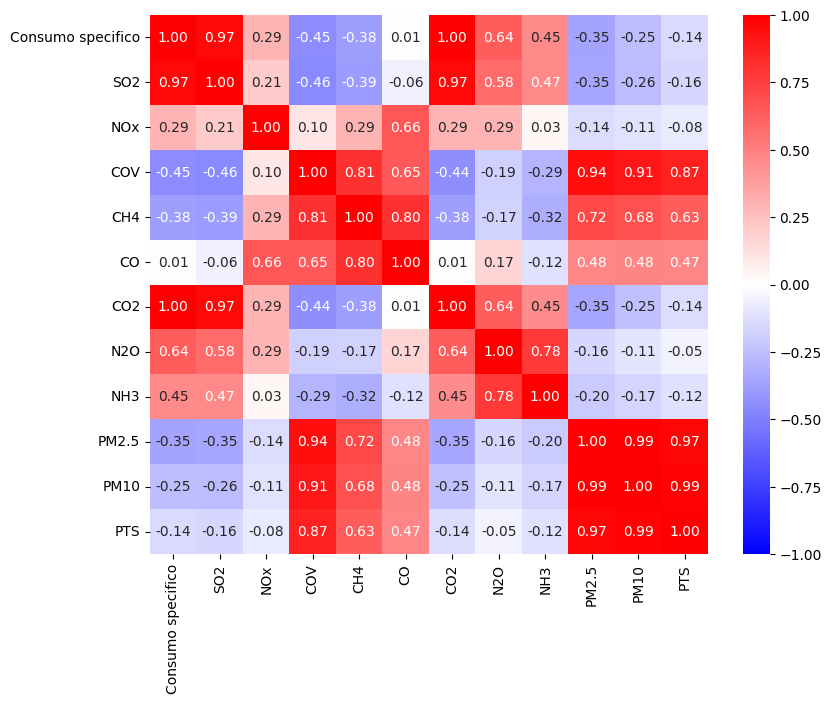

In [43]:
# Calcolo la correlazione tra le features (solo numeriche) nei veicoli a benzina
corr = df_benzinaverde.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

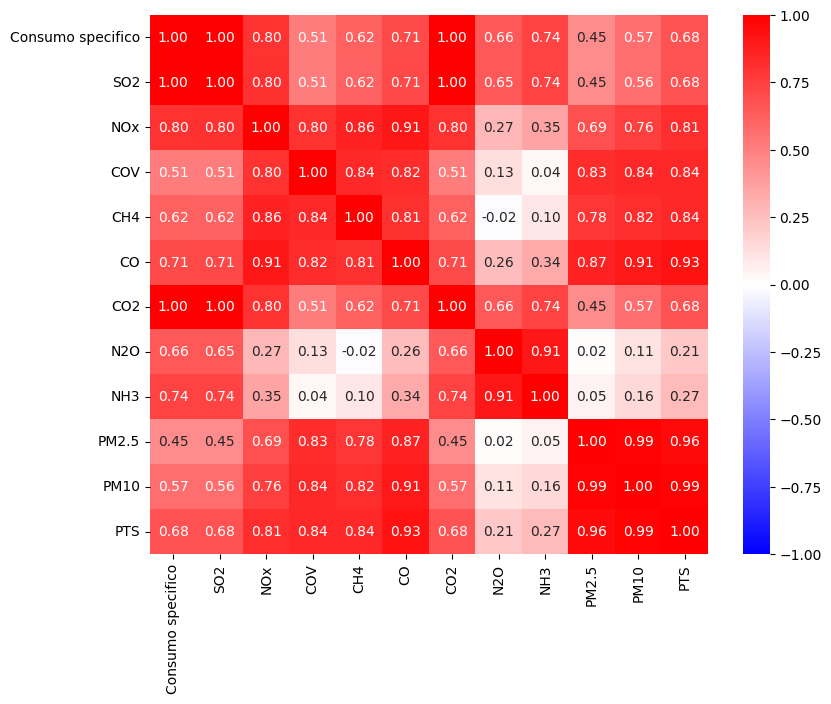

In [44]:
# Calcolo la correlazione tra le features (solo numeriche) nei veicoli a diesel
corr = df_diesel.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

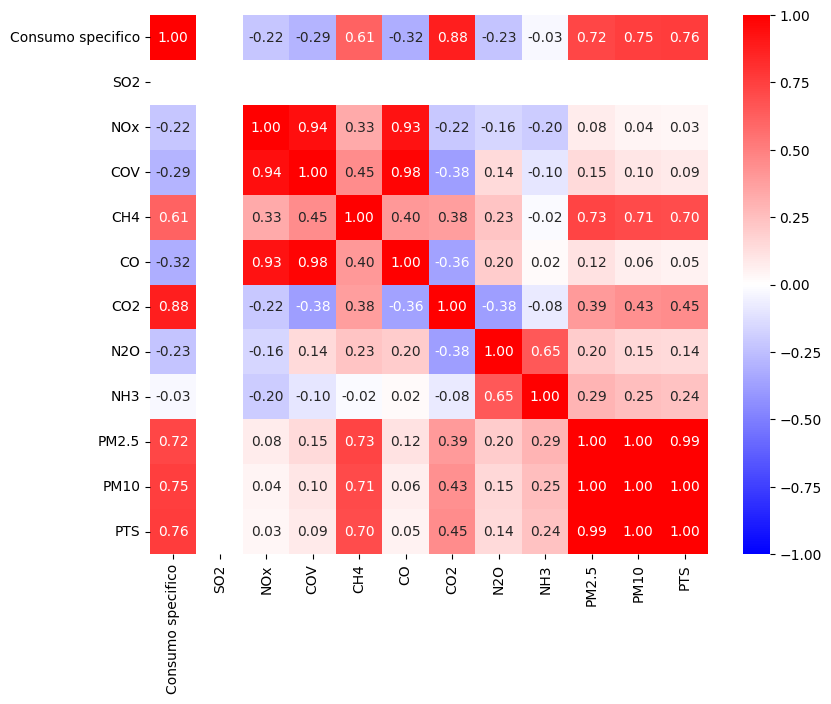

In [45]:
# Calcolo la correlazione tra le features (solo numeriche) nei veicoli a metalo e GPL
corr = df_metanoGPL.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

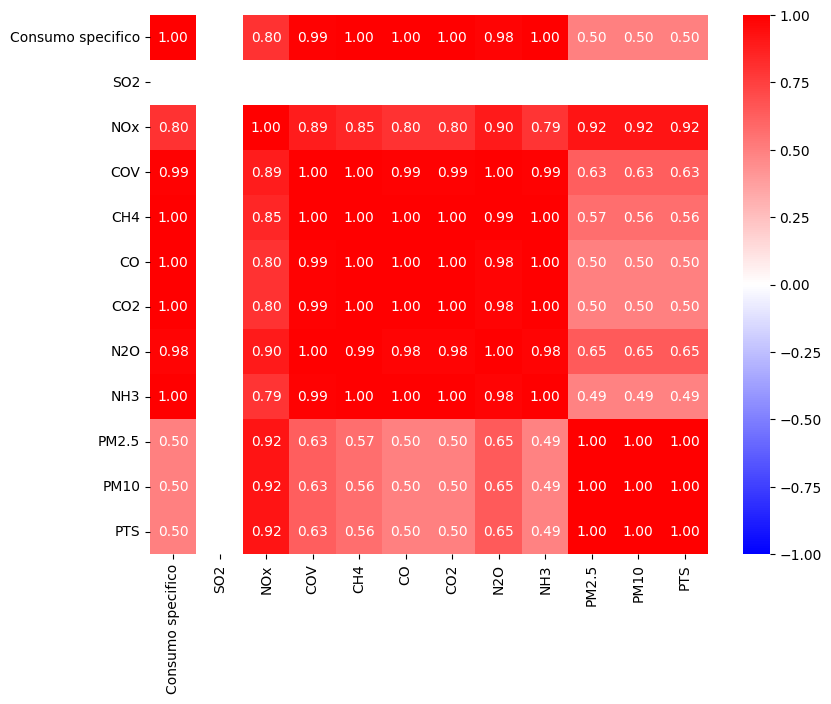

In [46]:
# Calcolo la correlazione tra le features (solo numeriche) nei veicoli a metalo e GPL
corr = df_metano.select_dtypes(include='number').corr()

# Visualizzo la matrice di correlazione
fig, ax = plt.subplots(1, figsize=(9, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='bwr', ax=ax)
plt.show()

Dalle heatmap relative ai carburanti possiamo notare con avvengano varie reazioni chimiche relative al combustibili.
Abbiamo osservato forti correlazioni per i veicoli a diesel e metano, perchè sono i tipi di combustibili che inquinano maggiormente l'ambiente, producendo tutti gli inquinanti elencati.
Inoltre, si nota come metano e metano/GPL non presentino le correlazioni di SO2, questo perchè questi tipi di di carburante non producono questo inquinante.

In [47]:
df[df['SO2'] == 0]

Settore Combustibile  \
14                         Automobili   metano/GPL   
15                         Automobili   metano/GPL   
16                         Automobili   metano/GPL   
17                         Automobili   metano/GPL   
18                         Automobili   metano/GPL   
19                         Automobili   metano/GPL   
20                         Automobili   metano/GPL   
35            Veicoli leggeri < 3.5 t   metano/GPL   
36            Veicoli leggeri < 3.5 t   metano/GPL   
37            Veicoli leggeri < 3.5 t   metano/GPL   
38            Veicoli leggeri < 3.5 t   metano/GPL   
39            Veicoli leggeri < 3.5 t   metano/GPL   
40            Veicoli leggeri < 3.5 t   metano/GPL   
41            Veicoli leggeri < 3.5 t   metano/GPL   
49  Veicoli pesanti > 3.5 t e autobus       metano   
50  Veicoli pesanti > 3.5 t e autobus       metano   
51  Veicoli pesanti > 3.5 t e autobus       metano   

                 Tipo legislativo                     Periodo  \
14                         Euro 0                  < 01/01/93   
15            Euro 1 - 91/441/EEC  da 01/01/1993 a 31/12/1996   
16              Euro 2 - 94/12/EC  da 01/01/1997 a 31/12/2000   
17   Euro 3 - 98/69/EC Stage 2000  da 01/01/2001 a 31/12/2005   
18   Euro 4 - 98/69/EC Stage 2005  da 01/01/2006 a 31/12/2010   
19                         Euro 5  da 01/01/2011 a 31/08/2015   
20                         Euro 6               da 01/09/2015   
35                   Conventional                  < 30/06/93   
36             Euro 1 - 93/59/EEC  da 01/10/1994 a 30/09/1998   
37              Euro 2 - 96/69/EC  da 01/10/1998 a 31/12/2000   
38   Euro 3 - 98/69/EC Stage 2000  da 01/01/2001 a 31/12/2005   
39   Euro 4 - 98/69/EC Stage 2005  da 01/01/2006 a 31/12/2010   
40           Euro 5 - EC 715/2007  da 01/01/2011 a 31/08/2015   
41           Euro 6 - EC 715/2007               da 01/09/2015   
49  Euro II - 91/542/EEC Stage II  da 01/10/1996 a 01/10/2000   
50   Euro III - 1999/96/EC step 1  da 01/01/2001 a 31/12/2004   
51                            EEV              da 01/01/2008    

    Consumo specifico  SO2           NOx          COV          CH4  \
14       57337.892023  0.0   2344.039021  1234.362835    54.255458   
15       56775.798279  0.0    442.365268   679.352418    59.311450   
16       56758.031391  0.0    168.583925   166.510925    23.464291   
17       57588.020428  0.0     96.517862    32.372870    23.811973   
18       56425.117660  0.0     65.561639    32.300717    11.377669   
19       56787.629982  0.0     35.210693    20.610608    15.711499   
20       56960.582902  0.0     39.774286    21.904611    17.775603   
35       58437.096716  0.0   2249.155288  1388.023057    57.386697   
36       57786.033768  0.0    447.730399   712.755905    63.385974   
37       59726.728960  0.0    184.806929   170.018533    41.845850   
38       62362.169335  0.0     97.909288    18.273734    52.029759   
39       60684.186758  0.0     70.270997    36.708329    44.262919   
40       62929.229650  0.0     37.073145    38.273469    66.146857   
41       63095.567763  0.0     42.002889    38.896371    67.707364   
49      515000.001312  0.0  15000.000036   200.000001  4500.000009   
50      455000.000834  0.0  10000.000016    50.000000  1280.000000   
51      455000.000071  0.0   2500.000000    20.000000   980.000000   

             CO           CO2        N2O         NH3      PM2.5        PM10  \
14  6193.895110  1.701562e+05   0.818383    9.207847  15.559937   27.017326   
15  3541.099177  1.683296e+05  19.992090   21.035991  15.721836   27.179225   
16  2246.934699  1.682586e+05   9.914590   27.631730  15.731413   27.188802   
17  1202.088654  1.698301e+05   4.020699   12.585898  14.402678   25.860067   
18   478.707243  1.675728e+05   4.061569   11.740978  14.400770   25.858158   
19   579.456549  1.677578e+05   1.122635   10.056776  14.865612   26.323001   
20   507.240077  1.678033e+05   1.127729   10.048268  14.918868   26.376

# FASE 2
Prepara il set di dati da usare per applicare almeno 2 algoritmi di ML di classificazione. Ovvero l’obiettivo è capire in base al consumo di combustibile come possono essere raggruppati tra loro i settori. La classificazione dei settori risultante è in linea con il tipo di combustibile? Ci sono combustibili assimilabili per consumo? Ci sono differenze tra i risultati degli algoritmi scelti?

Nei passagi precedenti, abbiamo constatato che il "periodo" e il "tipo legislativo" risultano ridondanti, in quanto ci sono delle corrispondenze tra i valori delle due categorie. Per verificarlo, stampiamo una tabella di contingenza: questa mostra quali e quante sono le corrispondenze tra i valori delle due colonne.

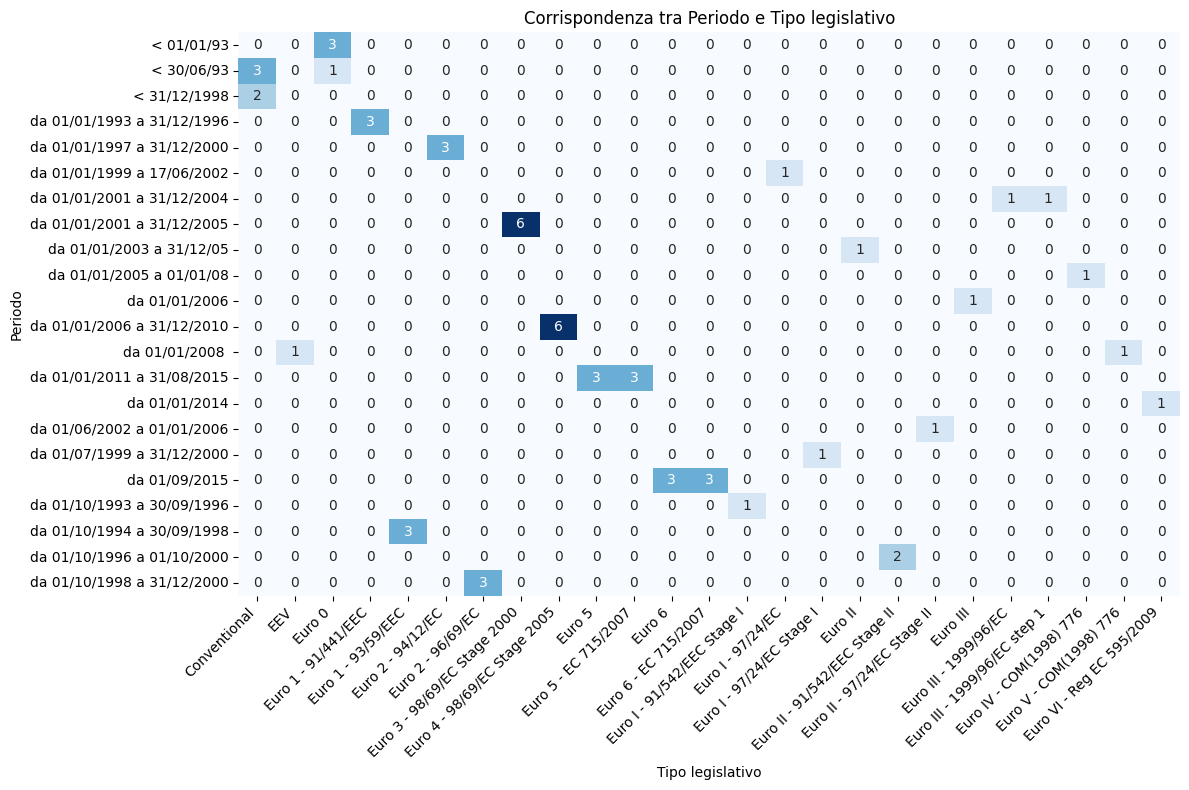

In [48]:
# Crea tabella di contingenza
pivot = df.groupby(["Periodo", "Tipo legislativo"]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Corrispondenza tra Periodo e Tipo legislativo")
plt.ylabel("Periodo")
plt.xlabel("Tipo legislativo")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

L'analisi mostra che, nella quasi totalità dei casi, esiste una corrispondenza 1:1 tra Periodo e Tipo Legislativo (un quadrato colorato per colonna). Abbiamo identificato alcune eccezioni (valori che presentano 2 quadrati colorati) che possono essere considerate come anomalie, data la minoranza numerica.
Dato ciò, abbiamo deciso di eliminare dal dataframe la colonna del periodo in quanto il tipo legislativo è di maggiore comprensione ed evita rindonzanze.

In [49]:
df.drop('Periodo', axis=1, inplace=True)
df_vecchio = df

Procediamo a convertire le colonne di tipo *qualitativo* in *quantitativo*, tramite l'utilizzo di etichette, per semplificare il successivo processo di classificazione.

In [50]:
le_consumo = LabelEncoder()
le_settore = LabelEncoder()
le_combustibile = LabelEncoder()
le_tipo_legislativo = LabelEncoder()

df['Settore'] = le_settore.fit_transform(df['Settore'])
df['Combustibile'] = le_combustibile.fit_transform(df['Combustibile'])
df['Tipo legislativo'] = le_tipo_legislativo.fit_transform(df['Tipo legislativo'])
df.head()

df_dummies = df
df_dummies.head()

Settore  Combustibile  Tipo legislativo  Consumo specifico       SO2  \
0        0             0                 2       61632.435413  1.204133   
1        0             0                 3       59253.481071  1.140755   
2        0             0                 5       56546.580118  1.125293   
3        0             0                 7       57539.715710  1.147106   
4        0             0                 8       59429.357610  1.187123   

           NOx          COV         CH4            CO            CO2  \
0  2084.048393  1620.773665  122.076129  12362.960114  190028.008697   
1   711.703829   588.338866   25.705812   5830.904280  182673.617018   
2   358.630231   157.147263   35.396946   2068.050436  174355.865318   
3    79.716127    15.488732   24.151833   1131.241819  177412.878088   
4    50.254159    10.406638   17.541094    362.634870  182827.674532   

         N2O         NH3      PM2.5       PM10        PTS  
0   8.179762    1.999326  15.565311  27.022700  40.058423  
1  15.460622  102.897094  15.733231  27.190619  40.226342  
2   7.945214  148.842319  15.732021  27.189409  40.225132  
3   2.582156   23.055528  14.404072  25.861460  38.897183  
4   1.945418   23.549106  14.400368  25.857756  38.893479



Settore:

*   Automobili: 0
*   Ciclomotori (< 50 cm3) : 1
*   Motocicli (> 50 cm3) : 2
*   Veicoli leggeri < 3.5 t: 3
*   Veicoli pesanti > 3.5 t e autobus: 4

---

Combustibili:

*   Benzina Verde: 0
*   Diesel: 1
*   Metano: 2
*   Metano/GPL: 3

---

Tipi legislativi:

*   Conventional: 0
*   EEV: 1
*   Euro 0: 2
*   Euro 1 - 91/441/EEC: 3
*   Euro 1 - 93/59/EEC: 4
*   Euro 2 - 94/12/EC: 5
*   Euro 2 - 96/69/EC: 6
*   Euro 3 - 98/69/EC Stage 2000: 7
*   Euro 4 - 98/69/EC Stage 2005: 8
*   Euro 5: 9
*   Euro 5 - EC 715/2007: 10
*   Euro 6: 11
*   Euro 6 - EC 715/2007: 12
*   Euro I - 91/542/EEC Stage I: 13
*   Euro I - 97/24/EC: 14
*   Euro I - 97/24/EC Stage I: 15
*   Euro II: 16
*   Euro II - 91/542/EEC Stage II: 17
*   Euro II - 97/24/EC Stage II: 18
*   Euro III: 19
*   Euro III - 1999/96/EC: 20
*   Euro III - 1999/96/EC step 1: 21
*   Euro IV - COM(1998) 776: 22
*   Euro V - COM(1998) 776: 23
*   Euro VI - Reg EC 595/2009: 24


## CLUSTERING


Abbiamo deciso di utilizzare il clustering perchè non necessita di un target specifico, e ci permette di capire in quali settori (non noti) possono essere suddivisi i dati.

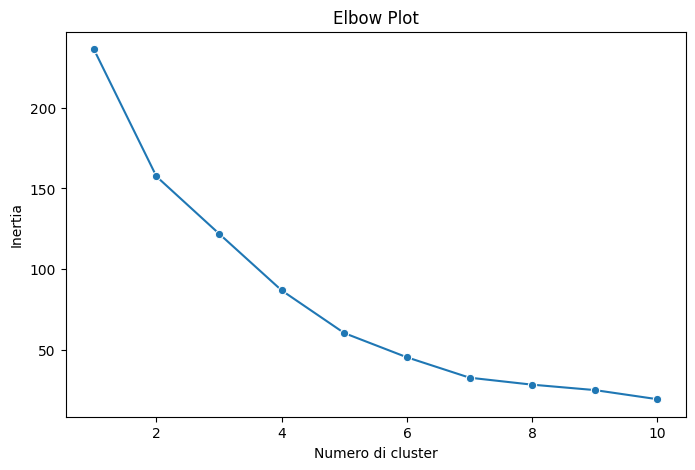

In [51]:
# Scegliamo le features
features = df[['Consumo specifico', 'Tipo legislativo', 'Combustibile', 'Settore']]

# Standardizzazione
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Metodo del gomito per scegliere il numero di cluster
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# stampa elbow plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()


Grazie a questo elbow plot riusciamo a intuire che il numero ideale di cluster da utilizzare è 7, poichè dopo quel punto notiamo una diminuzione della pendenza della curva, ciò indica che precedentemente e succesivamente al punto 7 ci sia un peggioramento nella descrizione della variabilità dei dati.

Applichiamo due diversi modelli di clustering: prima il K-means, dove dobbiamo indicare noi in quanti cluster suddividere i dati, e successivamente un clustering agglomerativo, che non richiede un input di numero di cluster.

###K-means

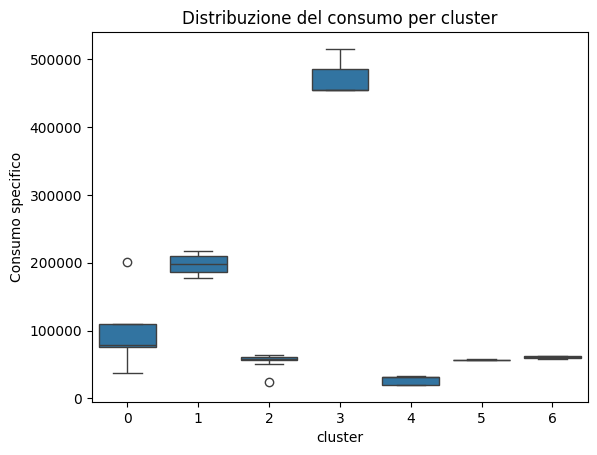

In [52]:
# Applica K-Means
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualizza i cluster
sns.boxplot(x='cluster', y='Consumo specifico', data=df)
plt.title('Distribuzione del consumo per cluster')
plt.show()

Calcoliamo la Silohuette score per valutare la qualità di un clustering, ovvero quanto un'osservazione è simile al proprio cluster rispetto agli altri.
Inoltre utilizziamo la PCA per ridurre la dimensione dei dati, catturando la maggior parte delle informazioni.

Silhouette Score: 0.514


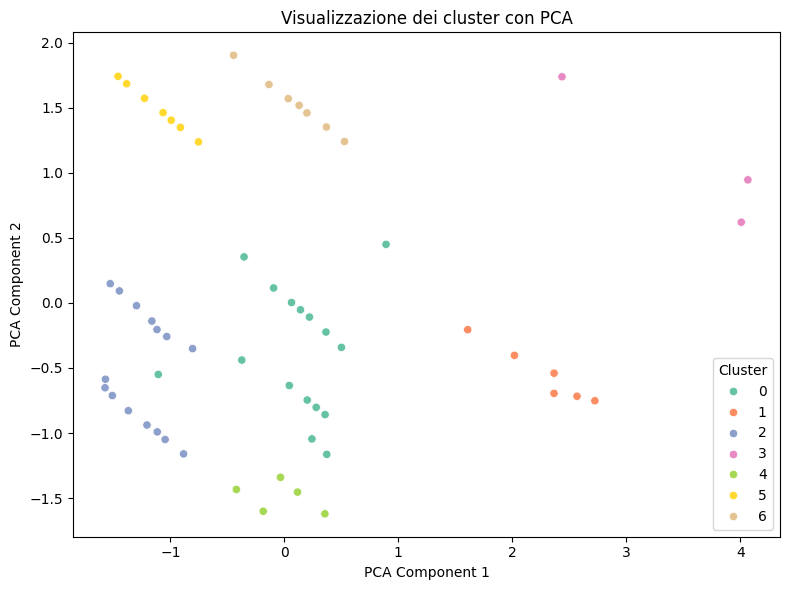

In [53]:
# Calcolo del Silhouette Score
score = silhouette_score(scaled_features, df['cluster'])
print(f"Silhouette Score: {score:.3f}")

# Visualizzazione con PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Visualizzazione dei cluster con PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

**INTERPRETAZIONE DELLA SILOHUETTE SCORE:**
* maggiore 0.7: clustering molto buono
* 0.5 - 0.7: buono
* 0.3 - 0.5: accettabile
* < 0.3: debole, forse troppi o troppo pochi cluster


**CONTROLLO PCA**

Separazione tra i gruppi:
* Se i cluster sono ben separati nel grafico, significa che K-Means ha trovato gruppi distinti.
* Se i cluster si sovrappongono molto, potrebbe esserci rumore o i gruppi non sono ben definiti.

Forma e densità:
* Cluster compatti e ben definiti sono un buon segno.
* Cluster sparsi o allungati potrebbero indicare che i dati non sono ben rappresentati da K-Means.

Distribuzione dei punti:
* Se un cluster è molto più grande o più piccolo degli altri, potrebbe essere utile rivedere il numero di cluster o le feature usate.

Dato lo score ottenuto (0.514), possiamo considerare il nostro modello di cluster buono, e dal grafico possiamo inoltre constatare che i punti all'interno del proprio cluster sono vicini, ma comunque distinti dai punti dei cluster adiacenti.

###Clustering Agglomerativo

Silhouette Score: 0.395


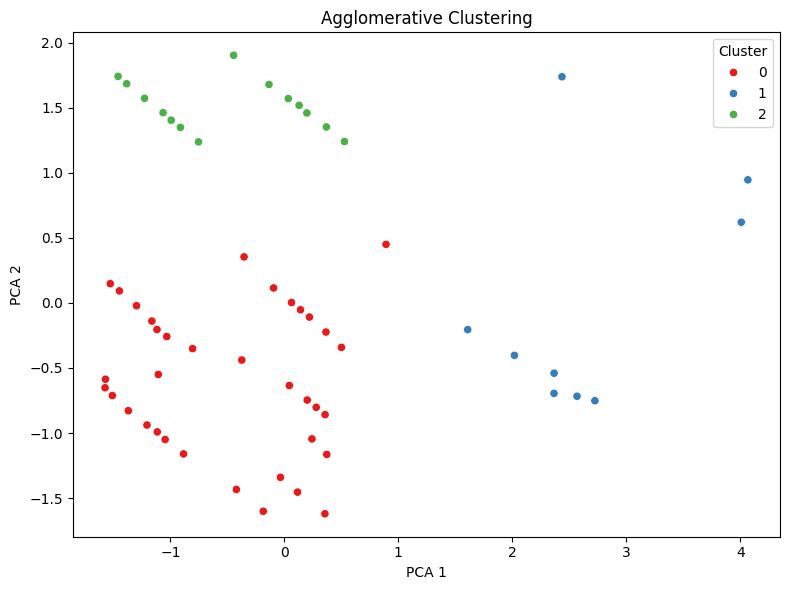

In [54]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(scaled_features)

# Silhouette Score
score = silhouette_score(scaled_features, df['agglo_cluster'])
print(f"Silhouette Score: {score:.3f}")

# PCA per visualizzazione
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

# Visualizzazione
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='agglo_cluster', palette='Set1')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Dato lo score ottenuto (0.395), notiamo che questo modello di cluster ha una qualità peggiore. Ciò secondo noi è dovuto dalla netta diminuizione di numero di cluster utilizzati dall'algoritmo (da 7 a 3 cluster usati).

Secondo la PCA i punti risultano comunque ben distinti ma meno densi per ogni cluster.

##Tabelle di contingenza e analisi dei combustibili

Eseguiamo nuovamente un controllo delle corrispondenze tra il tipo di combustibile e i cluster, per verificare se i cluster ricalcano i combustibili.

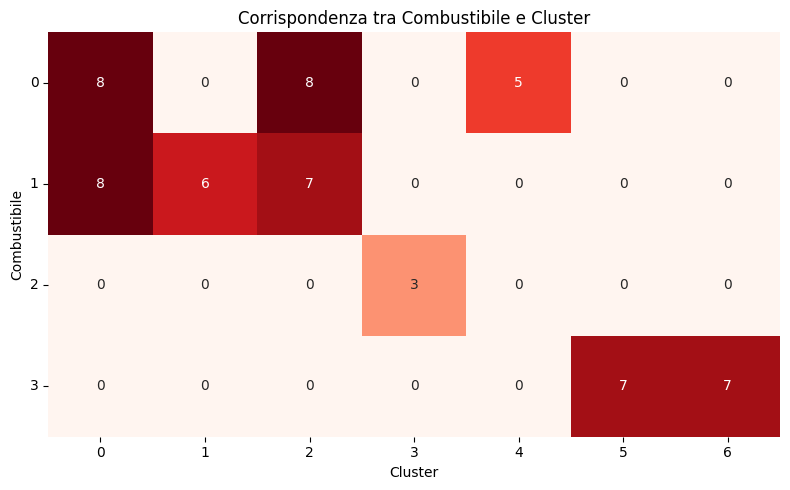

In [55]:
# Crea tabella di contingenza
pivot = df.groupby(["Combustibile", "cluster"]).size().unstack(fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Corrispondenza tra Combustibile e Cluster")
plt.ylabel("Combustibile")
plt.xlabel("Cluster")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

La maggioranza dei cluster presenta una corrispondenza con un certo tipo di combustibile, tranne i cluster 0 e 2 che sono distribuiti equamente tra benzina e diesel.

Eseguiamo lo stesso controllo sui cluster generati automaticamente dal clustering agglomerativo.

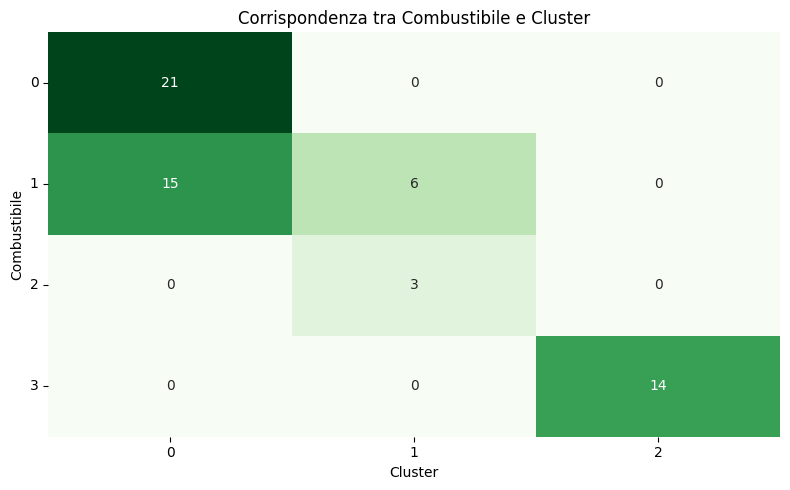

In [56]:
# Crea tabella di contingenza
pivot = df.groupby(["Combustibile", "agglo_cluster"]).size().unstack(fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Corrispondenza tra Combustibile e Cluster")
plt.ylabel("Combustibile")
plt.xlabel("Cluster")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Risulta meno preciso in quanto abbiamo più combustibili all'interno dello stesso cluster, a conferma di quanto evidenziato dal silouhette score.

Abbiamo assegnato a delle variabili la media dei consumi specifici per tipo di combustibile per controllare se ce ne fossero di assimilabili.

media benzina:  60196.469533452364
media diesel:  112163.33894235699
media metano:  475000.00073904934
media metano/gpl:  58832.43468673517


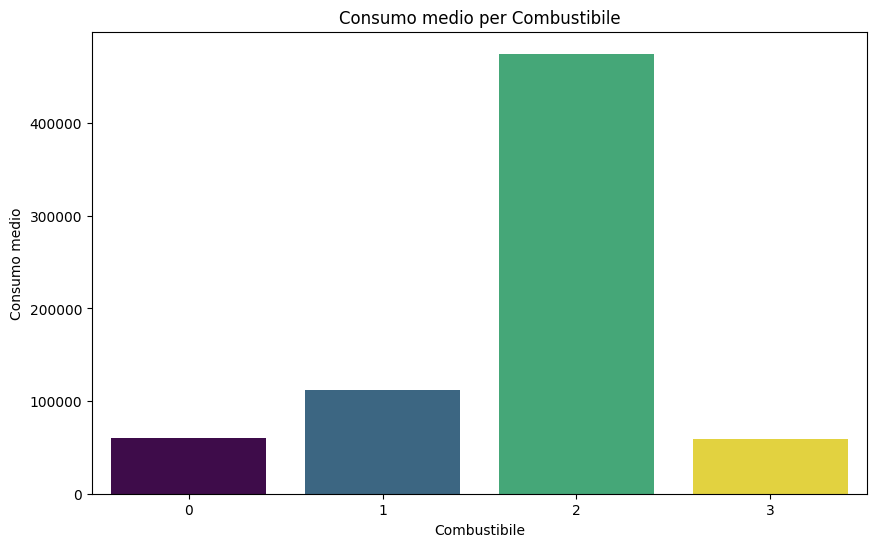

In [57]:
benzina = df[df["Combustibile"] == 0]["Consumo specifico"].mean()
diesel = df[df["Combustibile"] == 1]["Consumo specifico"].mean()
metano = df[df["Combustibile"] == 2]["Consumo specifico"].mean()
GPL = df[df["Combustibile"] == 3]["Consumo specifico"].mean()

print("media benzina: ", benzina)
print("media diesel: ", diesel)
print("media metano: ", metano)
print("media metano/gpl: ", GPL)

average_consumption = df.groupby('Combustibile')['Consumo specifico'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Combustibile', y='Consumo specifico', data=average_consumption, palette='viridis', hue='Combustibile', legend=False)
plt.title('Consumo medio per Combustibile')
plt.xlabel('Combustibile')
plt.ylabel('Consumo medio')
plt.xticks(rotation=0)
plt.show()

Possiamo notare che benzina (0) e metano/GPL (3) sono assimilabili per consumi.

Il metano (2) si contraddistingue per essere poco performante (alto consumo).

---

# FASE 3



Occorre prevedere l’andamento del PM10. Qual è l’agente che maggiormente incide sul PM10? Applica sui dati il modello di rete neurale scegliendo la funzione di attivazione e il numero di layer.

Per questa fase, abbiamo deciso di riprendere il dataframe originale, per utilizzare le variabili qualitative.

In [58]:
df = df_vecchio

Iniziamo con la ricerca delle correlazioni di PM10 con le altre features.

Correlazioni con PM10
PM10                 1.000000
PTS                  0.990599
PM2.5                0.988042
SO2                  0.595315
NOx                  0.547166
Settore              0.430857
CO2                  0.407375
Consumo specifico    0.386583
pca1                 0.374390
N2O                  0.163744
COV                  0.119625
CH4                  0.091917
Tipo legislativo     0.014057
pca2                 0.002241
CO                  -0.066404
Combustibile        -0.075098
agglo_cluster       -0.124075
NH3                 -0.177001
cluster             -0.383495
Name: PM10, dtype: float64


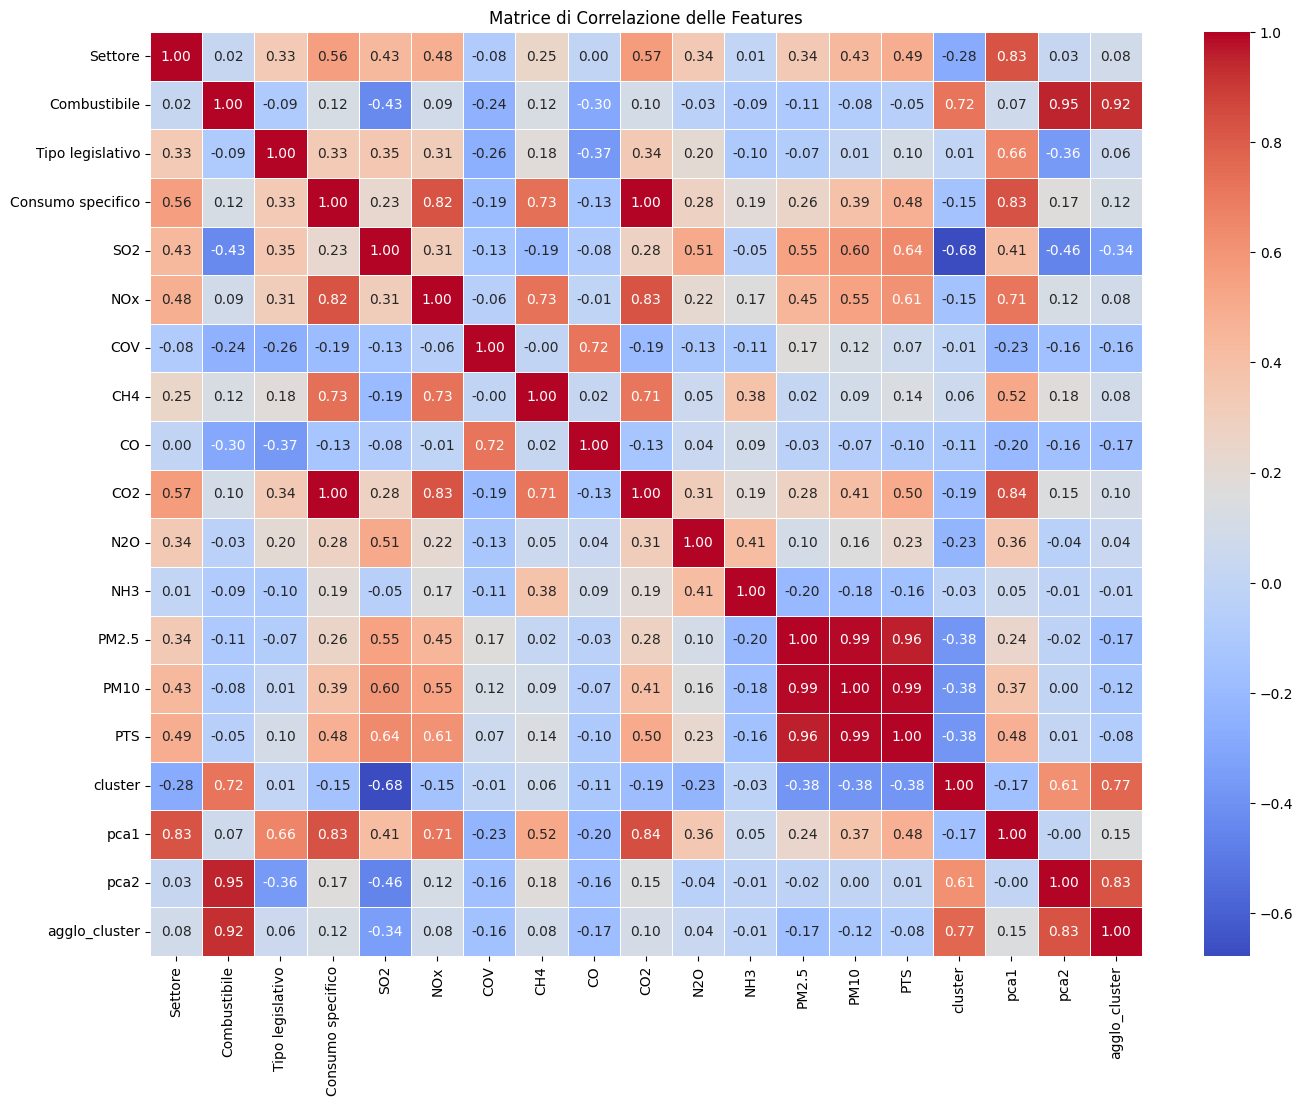

In [59]:
# Calcolo della matrice di correlazione per tutte le colonne numeriche
correlation_matrix = df_dummies.corr()

# Estraiamo le correlazioni con PM10
pm10_correlations = correlation_matrix['PM10'].sort_values(ascending=False)

print("Correlazioni con PM10")
print(pm10_correlations)

# Heatmap delle correlazioni
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione delle Features')
plt.show()

Dalla matrice di correlazione possiamo vedere che i valori più collegati a quelli di PM10 sono:
*   PM 2.5
*   PTS

Non ci sono altre correlazioni forti.

##PREVISIONE DELL'ANDAMENTO DI PM10

Per prevedere l'andamento di PM10, utilizzeremo un modello di rete feedforewarding neurale tramite l'uso di KERAS.

Dividiamo i dati in train e test set per addestrare la rete neurale

In [60]:
# Copiamo il df per sicurezza
df_copia = df

# Creiano X e Y
X = df_copia.drop(columns=['PM10'])
y = df_copia['PM10']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 48)

# Scaliamo le features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creiamo una rete neurale con 2 layer nascosti  (non danno un output visibile al'utente) e che lavorano sui dati di training:
 * layer da 64 neuroni
 * layer da 32 neuroni

Successivamente c'è un layer non nascosto per fornire l'output in modo lineare (valore continuo).

L'attivazione avviene tramite RELU.

Utilizziamo ADAM per l'ottimizzazione.

In [61]:
# rete neurale feedforewarding con 2 layer nascpsti con attivazione Relu e output lineare
model = Sequential()
# primo layer: riceve dati (64 neuroni)
model.add(Dense(64, input_dim= X_train.shape[1], activation='relu'))
# secondo layer: elabora (32 neuroni)
model.add(Dense(32, activation='relu'))
# terzo layer: restituisice l'output (1 neurone)
model.add(Dense(1, activation= 'linear'))

# ottimizzazione con Adam
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Addestramento del modello.

Epoch indica un passaggio completo del dataset di training attraverso gli algoritmi di ML.

In [62]:
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - loss: 17878.3105 - mae: 90.8396 - val_loss: 3439.2671 - val_mae: 45.9662
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 17277.3926 - mae: 89.9417 - val_loss: 3425.9797 - val_mae: 45.8216
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 18003.1602 - mae: 91.0671 - val_loss: 3413.8027 - val_mae: 45.6908
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 16968.6133 - mae: 88.7790 - val_loss: 3402.7817 - val_mae: 45.5713
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 18115.0020 - mae: 91.7386 - val_loss: 3392.2156 - val_mae: 45.4545
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 16633.4453 - mae: 89.0826 - val_loss: 3381.9673 - val_mae: 45.3391
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 18501.5566 - mae: 93.0293 - val_loss: 3372.0398 - val_mae: 45.2272
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 17030.5703 - mae: 88.6234 - val_loss: 3362.2415 - val_mae: 45.1154

Calcoliamo MAE (differenza tra valore reale e valore previsto) e R^2 (legame tra la variabilità dei dati e la correttezza del modello statistico utilizzato) per vedere quanto il modello è stato addestrato correttamente sui dati di training.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
MAE:  20.493
R2:  0.746


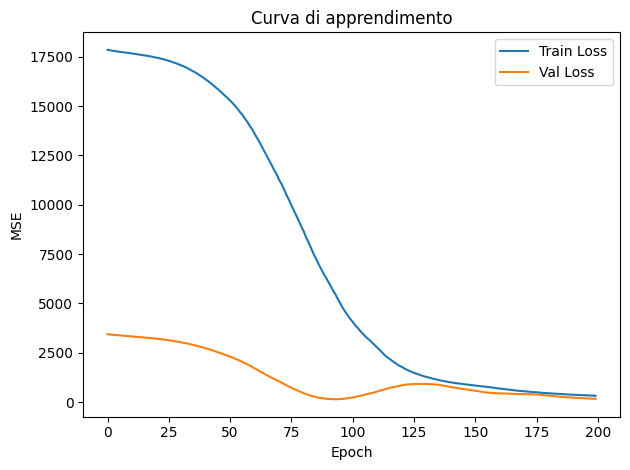

In [63]:
y_pred = model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae: .3f}")
print(f"R2: {r2: .3f}")

plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Curva di apprendimento")
plt.tight_layout()
plt.savefig("curva_apprendimento.png")
plt.show()
plt.close()

Il grafico rappresenta la curva di apprendimento, ovvero l’andamento dell’errore della rete neurale durante l’addestramento.
* Train Loss (blu): l’MSE calcolato sui dati di addestramento.
* Val Loss (arancione): l’errore calcolato sui dati di validazione (dati che il modello non vede durante il training, usati per testarne la generalizzazione).

Dato che le due curve convergono lentamente e non si sovrappongono mai effettivamente, possiamo dedurre che l'apprendimento del modello è lento e non del tutto ottimale.

Salviamo il modello creato in locale per usarlo in futuro.

In [64]:
model.save("PM10_model.keras")
pd.to_pickle(scaler, "PM10_scaler.pkl")

Test: proviamo il modello di rete neurale appena creato sul dataset originale senza i valori del PM10 per valutare la correttezza dei valori calcolati.

In [65]:
df_prova = df.drop(columns=['PM10'])

In [66]:
scaler = pickle.load(open("PM10_scaler.pkl", "rb"))
model = tf.keras.models.load_model("PM10_model.keras")

X_new_scaled = scaler.transform(df_prova)
pred_pm10 = model.predict(X_new_scaled).flatten()

for i, val in enumerate(pred_pm10):
  print(f"Stima PM10: {val: .2f}, valore reale {df['PM10'][i]:.2f} microg/cm3")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Stima PM10:  36.86, valore reale 27.02 microg/cm3
Stima PM10:  21.93, valore reale 27.19 microg/cm3
Stima PM10:  21.74, valore reale 27.19 microg/cm3
Stima PM10:  25.94, valore reale 25.86 microg/cm3
Stima PM10:  25.42, valore reale 25.86 microg/cm3
Stima PM10:  26.82, valore reale 26.32 microg/cm3
Stima PM10:  23.70, valore reale 26.38 microg/cm3
Stima PM10:  135.64, valore reale 237.56 microg/cm3
Stima PM10:  66.55, valore reale 95.75 microg/cm3
Stima PM10:  54.02, valore reale 75.96 microg/cm3
Stima PM10:  42.71, valore reale 60.68 microg/cm3
Stima PM10:  38.42, valore reale 60.31 microg/cm3
Stima PM10:  27.88, valore reale 27.72 microg/cm3
Stima PM10:  24.18, valore reale 26.87 microg/cm3
Stima PM10:  40.39, valore reale 27.02 microg/cm3
Stima PM10:  32.78, valore reale 27.18 microg/cm3
Stima PM10:  31.57, valore reale 27.19 microg/cm3
Stima PM10:  30.92, valore reale 25.86 microg/cm3
Stima PM10:  30.41, valore reale 25.86 microg/cm3
Stima PM10

Calcoliamo alcuni coefficienti di errore per capire l'affidabilità del modello.

In [67]:
# Root Mean Squared Error (RMSE)
mse = mean_squared_error(df['PM10'], pred_pm10)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} microg/cm3")

# R-squared (Coefficiente di Determinazione)
r2 = r2_score(df['PM10'], pred_pm10)
print(f"R-squared (R2): {r2:.4f}")

if r2 > 0.7:
    print("\nIl modello spiega una buona parte della varianza nei dati reali.")
elif r2 > 0.4:
    print("\nIl modello spiega una moderata parte della varianza nei dati reali.")
else:
    print("\nIl modello non spiega bene la varianza nei dati reali.")

print(f'Errore medio sulle previsioni:  {rmse:.2f} microg/cm3')

Root Mean Squared Error (RMSE): 21.28 microg/cm3
R-squared (R2): 0.9383

Il modello spiega una buona parte della varianza nei dati reali.
Errore medio sulle previsioni:  21.28 microg/cm3


Proviamo a creare una nuova rete neurale con 3 layer nascosti per vedere se i risultati migliorano.

In [68]:
# rete neurale feedforewarding con 3 layer nascosti con attivazione Relu e output linear
model = Sequential()
# primo layer: riceve dati (64 neuroni)
model.add(Dense(64, input_dim= X_train.shape[1], activation='relu'))
# secondo layer: elabora (32 neuroni)
model.add(Dense(32, activation='relu'))
# terzo layer: elabora (16 neuroni)
model.add(Dense(16, activation='relu'))
# quarto layer: restituisice l'output (1 neurone)
model.add(Dense(1, activation= 'linear'))

# ottimizzazione con Adam
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 18546.5098 - mae: 93.3380 - val_loss: 3376.9329 - val_mae: 45.1608
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 18464.2930 - mae: 92.7398 - val_loss: 3371.3022 - val_mae: 45.1010
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 18353.4648 - mae: 91.9916 - val_loss: 3365.1851 - val_mae: 45.0365
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 18222.6074 - mae: 91.4183 - val_loss: 3358.2134 - val_mae: 44.9631
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 14396.2061 - mae: 83.0482 - val_loss: 3350.7844 - val_mae: 44.8842
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 17081.5508 - mae: 88.0225 - val_loss: 3343.0103 - val_mae: 44.8021
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 18176.7637 - mae: 91.0998 - val_loss: 3334.2632 - val_mae: 44.7120
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 18298.5996 - mae: 91.9811 - val_loss: 3324.9883 - val_mae: 44.6158

Effettiamo i controlli precedenti.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Mean Absolute Error (MAE):  12.311
R-squared (R2) Score:  0.897


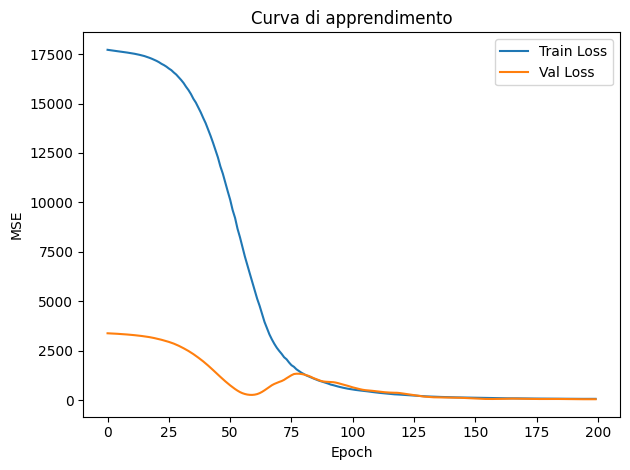

In [70]:
y_pred = model.predict(X_test_scaled).flatten()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae: .3f}")
print(f"R-squared (R2) Score: {r2: .3f}")

plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Curva di apprendimento")
plt.tight_layout()
plt.savefig("curva_apprendimento.png")
plt.show()
plt.close()

Come ci aspettavamo, un modello di rete neurale con più layers performa meglio data la maggiore quantità di operazioni eseguite sui dati.
Man mano che le epoch aumentano, le due curve scendono rapidamente, segno che la rete sta imparando a prevedere il PM10.
Entrambe le curve convergono verso valori bassi, quindi il modello sta generalizzando bene.

In [71]:
model.save("PM10_model.keras")
pd.to_pickle(scaler, "PM10_scaler.pkl")

# togliamo la colonna per verificare la corretta previsione
df_prova = df.drop(columns=['PM10'])

In [72]:
scaler = pickle.load(open("PM10_scaler.pkl", "rb"))
model = tf.keras.models.load_model("PM10_model.keras")

X_new_scaled = scaler.transform(df_prova)
pred_pm10_2 = model.predict(X_new_scaled).flatten()

for i, val in enumerate(pred_pm10_2):
  print(f"Stima PM10 riga {i+1}: {val: .2f} microg/cm3")

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Stima PM10 riga 1:  28.88 microg/cm3
Stima PM10 riga 2:  22.77 microg/cm3
Stima PM10 riga 3:  29.21 microg/cm3
Stima PM10 riga 4:  28.80 microg/cm3
Stima PM10 riga 5:  29.22 microg/cm3
Stima PM10 riga 6:  30.62 microg/cm3
Stima PM10 riga 7:  28.11 microg/cm3
Stima PM10 riga 8:  172.10 microg/cm3
Stima PM10 riga 9:  76.18 microg/cm3
Stima PM10 riga 10:  59.76 microg/cm3
Stima PM10 riga 11:  46.00 microg/cm3
Stima PM10 riga 12:  42.16 microg/cm3
Stima PM10 riga 13:  28.53 microg/cm3
Stima PM10 riga 14:  25.14 microg/cm3
Stima PM10 riga 15:  32.60 microg/cm3
Stima PM10 riga 16:  29.75 microg/cm3
Stima PM10 riga 17:  28.95 microg/cm3
Stima PM10 riga 18:  29.06 microg/cm3
Stima PM10 riga 19:  29.19 microg/cm3
Stima PM10 riga 20:  29.29 microg/cm3
Stima PM10 riga 21:  28.67 microg/cm3
Stima PM10 riga 22:  41.80 microg/cm3
Stima PM10 riga 23:  30.11 microg/cm3
Stima PM10 riga 24:  36.09 microg/cm3
Stima PM10 riga 25:  36.36 microg/cm3
Stima PM10 riga 26: 

In [73]:
# Root Mean Squared Error (RMSE)
mse = mean_squared_error(df['PM10'], pred_pm10_2)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} microg/cm3")

# R-2 (Coefficiente di Determinazione)
r2 = r2_score(df['PM10'], pred_pm10_2)
print(f"R-squared (R²): {r2:.4f}")

if r2 > 0.7:
    print("\nIl modello spiega una buona parte della varianza nei dati reali.")
elif r2 > 0.4:
    print("\nIl modello spiega una moderata parte della varianza nei dati reali.")
else:
    print("\nIl modello non spiega bene la varianza nei dati reali.")

print(f'Errore medio sulle previsioni:  {rmse:.2f} microg/cm3')

Root Mean Squared Error (RMSE): 11.62 microg/cm3
R-squared (R²): 0.9816

Il modello spiega una buona parte della varianza nei dati reali.
Errore medio sulle previsioni:  11.62 microg/cm3


Abbiamo constatato, grazie ai valori di MSE e R^2, che il modello di rete neurale con più layers funziona meglio nella previsione dei dati.

# FASE 4

Scegli e utilizza altri modelli previsionale, il risultato migliora? Riesci ad usare l’ai generativa per commentare i risultati ottenuti?

##Regressione multipla

Facciamo la regressione multipla per prevedere l'andamento del PM10 in relazione ai fattori più correlati, che sono PM2.5 e PTS (come evidenziato nelle fasi precedenti).

Train test R2:  0.9998044412252656
Test test R2:  0.9994533231909295
RMSE:  9.520995462920297


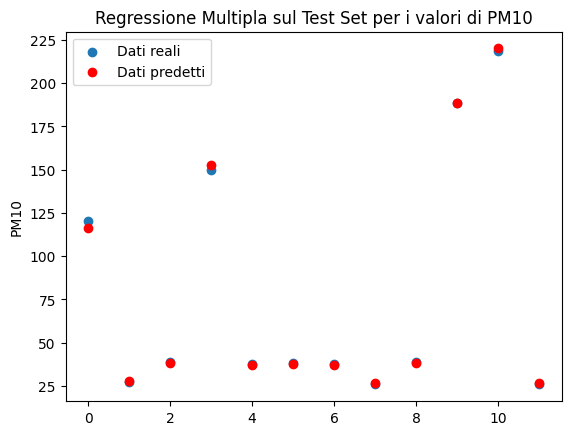

In [74]:
y = df['PM10'].to_numpy()
X = df[['PM2.5', 'PTS']].to_numpy()

# Splittaggio del database
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Regressione
reg = LinearRegression().fit(X_train, y_train)

# Calcolo previsioni R^2 e RMSE
y_test_pred = reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
y_train_pred = reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))

print(f'Train test R2: ', r2_train)
print(f'Test test R2: ',r2_test)
print(f'RMSE: ', rmse)

plt.figure()
plt.scatter(range(len(y_test)), y_test, label='Dati reali')
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Dati predetti')
plt.ylabel('PM10')
plt.title(f'Regressione Multipla sul Test Set per i valori di PM10')
plt.legend()
plt.show()

Data il dataset molto piccolo e le variabili sono molte correlate, può succedere che il valore di R^2 venga predetto in maniera più precisa (molto vicino all'1).

Il fatto che i due R^2 siano molto simili mostra che il modello performa in maniera analoga sia su dati noti che su dati nuovi.

Abbiamo deciso di mostrare la forte linearità tra i dati tramite due regressioni lineari singole tra PM2.5 e PTS con PM10.

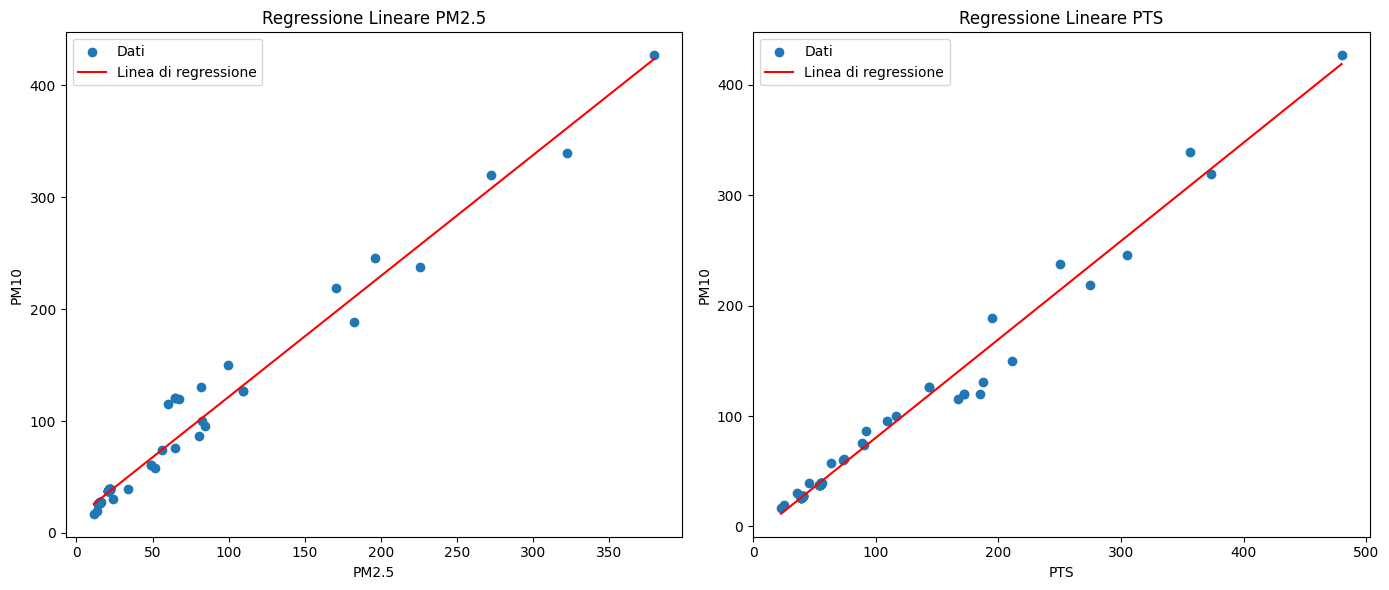

In [106]:
#Regressione linare tra PM10 e le singole features
y = df['PM10'].to_numpy()
columns = df[['PM2.5', 'PTS']]

# Creiamo la griglia
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cicliamo sulle colonne
for c, col_name in enumerate(columns):
    # Selezioniamo l'asse
    ax = axes[c]
    # Assegniamo le X alle features
    X = df[[col_name]].to_numpy()
    # Splitting del database
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    # Regressione Lineare
    reg = LinearRegression().fit(X_train, y_train)

    # Plotting
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot_pred = reg.predict(X_plot)
    ax.scatter(X, y, label='Dati')
    ax.plot(X_plot, y_plot_pred, color='red', label='Linea di regressione')
    ax.set_xlabel(col_name)
    ax.set_ylabel('PM10')
    ax.set_title(f'Regressione Lineare {col_name}')
    ax.legend()

# Mostriamo l'immagine
plt.tight_layout()
plt.show()

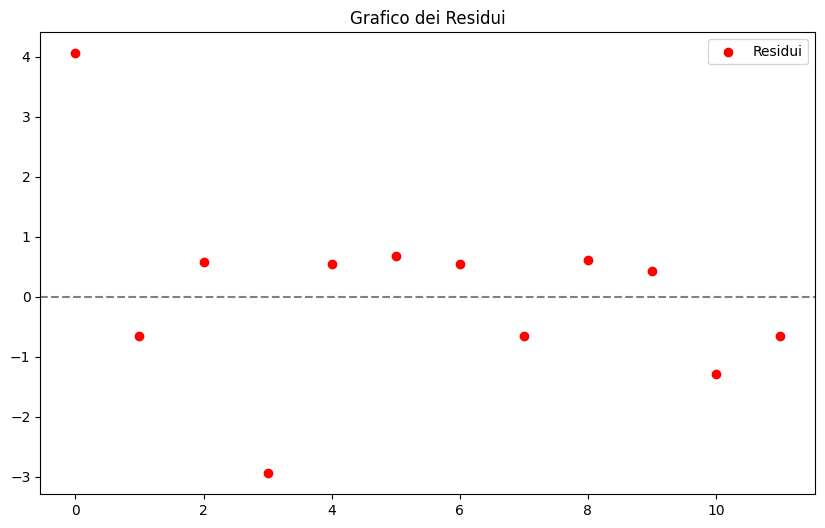

In [75]:
# Stampa dei residui
residui = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residui)), residui, color='red', label='Residui')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Grafico dei Residui')
plt.legend()
plt.show()

Dalla stampa dei residui si può notare come i valori non seguano un pattern specifico e quindi non ci siano relazioni non catturate dal nostro modello.
La media dei residui è distribuita in modo casuale attorno allo 0, quindi la differenza fra i valori reali e quelli predetti è piuttosto bassa, ergo, le predizioni si avvicinano molto ai valori reali.

##KNN

Testiamo un secondo modello di regressione per testare ulteriormente l'andamento del PM10.

In [76]:
y = df['PM10'].to_numpy()
X = df[['PM2.5', 'PTS']].to_numpy()

# Standardizzare le x
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splittaggio dei dati
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# KNN (con numero migliore di vicini)
neigh = KNeighborsRegressor(n_neighbors=12)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

# RMSE e R^2
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 5.07
R^2: 0.86


Possiamo notare come l'R2 sia nettamente peggiorato rispetto al modello di regressione multipla, questo potrebbe riguardare sempre poca densità dei dati.

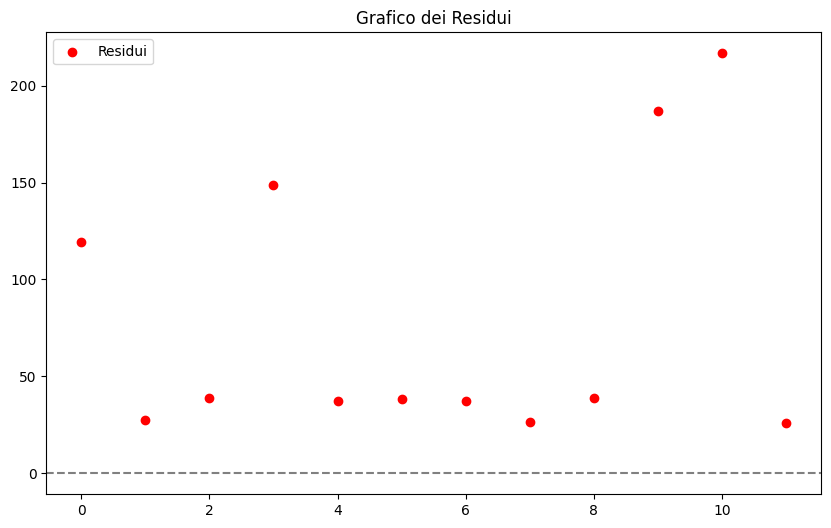

In [77]:
# Stampa dei residui
y_test_pred = reg.predict(X_test)
residui = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residui)), residui, color='red', label='Residui')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Grafico dei Residui')
plt.legend()
plt.show()

Possiamo notare come non siano presenti valori sotto allo zero, questo indica che l'errore avviene sempre per eccesso. I residui sono distribuiti comunque casualmente, anche se si può notare una differenza rispetto al primo.

##GEN AI

Utiliziamo ora l'AI generativa per commentare i risultati ottenuti precedentemente.

Immagine caricata: /content/download2.png


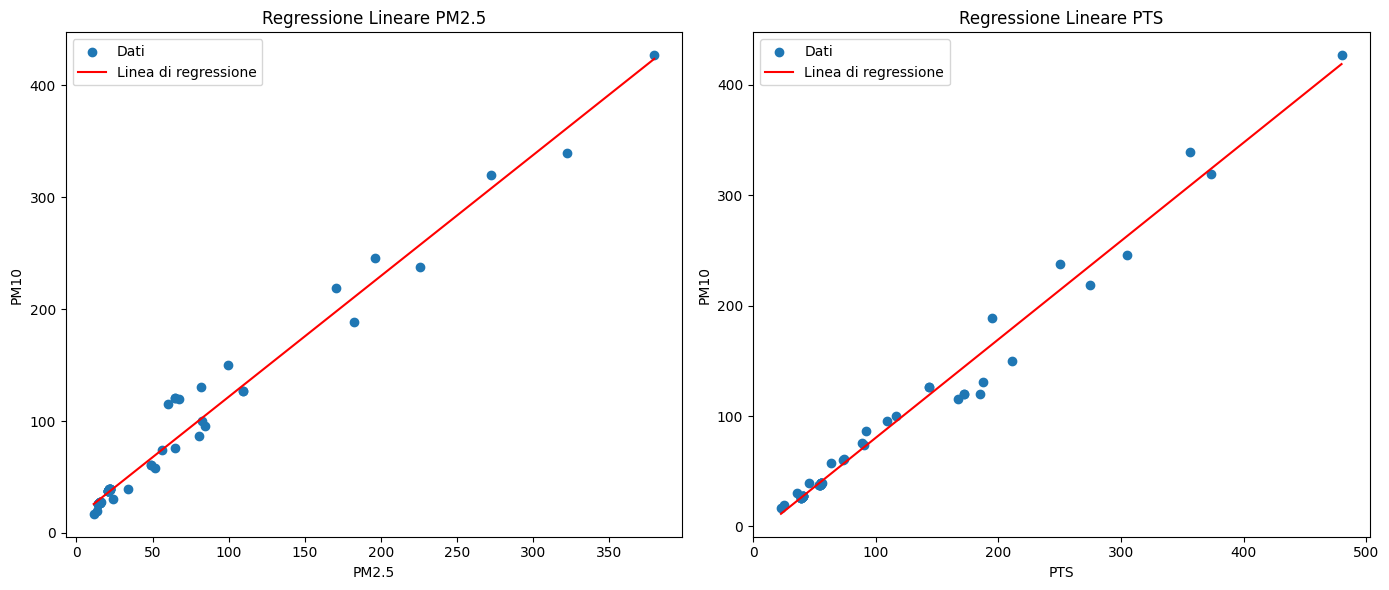

In [107]:
local_image_path = "/content/download2.png"

try:
    # Controlliamo se il file esiste prima di provare ad aprirlo
    if not os.path.exists(local_image_path):
        raise FileNotFoundError(f"Il file immagine '{local_image_path}' non è stato trovato.")
    # Carichiamo l'immagine
    image = Image.open(local_image_path).convert("RGB")
    print(f"Immagine caricata: {local_image_path}")
except FileNotFoundError as e:
    print(f"Errore: {e}")
    print("Assicurati che il percorso del file sia corretto e che il file esista.")
    exit()
except Exception as e:
    print(f"Si è verificato un errore durante il caricamento dell'immagine: {e}")
    exit()

display(image)

Dopo aver scaricato l'immagine, utilizziamo BLIP per generare una prima caption all'immagine.

In [108]:
# utilizzo di BLIP
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# Se disponibile, sposta il modello su GPU per accelerare l'elaborazione
if torch.cuda.is_available():
    model.to("cuda")
    print("Modello BLIP spostato su GPU")

# Preprocessiamo l'immagine e prepara gli input per il modello
inputs = processor(images=image, return_tensors="pt")

# Spostiamo gli input sulla GPU se il modello è lì
if torch.cuda.is_available():
    inputs = {k: v.to("cuda") for k, v in inputs.items()}

# Generiamo la descrizione (caption) dell'immagine
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)
print("Didascalia generata:", caption)

Didascalia generata: a line graph of a person ' s life expect and a line of progress


La didascalia è un po' confusa e potrebbe essere più precisa: per questo motivo decidiamo di testare un ulteriore modello.

In [115]:
# utilizzo di BLIP2
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b").to(device)
model.eval()

inputs = processor(images=image, text="", return_tensors="pt").to(device)

model.to(inputs["pixel_values"].device)

with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=3000, do_sample=True, temperature=0.8, repetition_penalty=1.1)

caption = processor.decode(output[0], skip_special_tokens=True)
print("Didascalia dettagliata:", caption)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Didascalia dettagliata: figure 2 two data plots showing the same graph and different time periods



La seconda frase risulta migliorata, modificando il livello di temperatura riusciamo ad ottenere un risultato diverso in quanto questo influenza la creatività del modello.

Abbiamo provato due versioni di BLIP in combinazione con GPT-2 senza e con *attention_mask*, la quale serve per uniformare la lunghezza delle frasi (sequenze di token), e *padding:* i modelli lavorano meglio se tutte le frasi hanno la stessa lunghezza, se una frase è più corta, si aggiungono dei token finti (padding) alla fine.

In [113]:
# utilizzo BLIP con GPT-2 senza attention_mask e padding
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# Creazione della caption con BLIP
inputs = processor(images=image, return_tensors="pt").to(device)
caption_ids = blip_model.generate(**inputs)
caption = processor.decode(caption_ids[0], skip_special_tokens=True)

# Espandiamo la descrizione con GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)
input_text = f"Describe a scene based on: {caption}"
inputs = tokenizer.encode(input_text, return_tensors="pt").to(device)

outputs = gpt2_model.generate(inputs, max_length=200, num_return_sequences=1, no_repeat_ngram_size=2)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Descrizione BLIP:", caption)
print("\nTesto creativo generato da GPT-2:")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Descrizione BLIP: a plot with a line graph and a line graph

Testo creativo generato da GPT-2:
Describe a scene based on: a plot with a line graph and a line graph with an optional plot.

Example:
.plot(lineGraph, plot, lineGraph)
,
 (plot, "A" , "B" )
: plot( "C" ), plot("A", "b" ).plot()
- (line, graph, ( "a" + "c" ))
"A": plot({ "x": "0.0", { "y": 0.5 }, "z": { 0 : "1.2", 1 : 0 }, 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39


In [114]:
# utilizzo BLIP con GPT-2 con attention_mask e padding
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Creiamo la caption con BLIP
input_text = f"Describe: {caption}"
inputs = tokenizer.encode_plus(
    input_text,
    return_tensors="pt",
    padding=True,
    truncation=True
).to(device)

# Generiamo l'output passando anche l'attention_mask tramite GPT-2
outputs = gpt2_model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_length=200,
    num_return_sequences=1,
    no_repeat_ngram_size=2
)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Descrizione BLIP:", caption)
print("\nTesto creativo generato da GPT-2:")
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Descrizione BLIP: a plot with a line graph and a line graph

Testo creativo generato da GPT-2:
Describe: a plot with a line graph and a line graph.

Example:
.plot(line, line, graph, x, y, z)
,
 (x,y,z) => x + y + z
: plot(x + x) + plotline(y +y) = x
- plot (line + line) x = y
The plot is a function that takes a list of lines and returns a graph of the lines. The graph is then used to plot the line. It is also a way to define a new line and to add a label to the graph to indicate that the label is being added. For example, the following plot shows the plot of a single line: .plot({ x: x * y * z }) .
In the above example the x and y labels are added to a row of x , y and z . The x label has been added as a placeholder for the y label. In the


Notiamo che con l'utilizzo della maschera e del padding l'output risulta più coerente e sensato rispetto al input fornito.



---



# Grazie per l'attenzione!
Sofia Caroli

Anna Passini

Gabriele Ricci